## Sentiment Analysis for looting incident in south africa 2021
   1. https://github.com/rafaljanwojcik/Unsupervised-Sentiment-Analysis
   2. https://medium.com/geekculture/how-to-label-unlabeled-tweets-fb701b97ebf
   3. https://github.com/HudaKas
   4. https://ermlab.com/en/blog/nlp/polish-sentiment-analysis-using-keras-and-word2vec/
   5. https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

## Adding an auxiliary task
   1. https://www.kaggle.com/mschumacher/adding-an-auxiliary-task

## Improved the accuracy of pre-trained word Embeddings for Sentiment Analysis
   1. https://github.com/PrashantRanjan09

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import os; os.environ["TF_KERAS"]='1'

In [2]:
from __future__ import print_function

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
import os, sys, re
import ast
import string
import pandas as pd
import numpy as np
import pickle

In [5]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/abbey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/abbey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/abbey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from string import punctuation
from gensim.models import KeyedVectors
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
from sklearn.feature_selection import chi2
import chardet
from collections import Counter
import itertools

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [8]:
# scikit-sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder,MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import gensim
import scikitplot.plotters as skplt

In [9]:
# !pip install --upgrade tensorflow-gpu==2.3.0

In [10]:
# deep learning libraries
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, concatenate, Dense, Activation, Dropout, SpatialDropout1D,GlobalAveragePooling1D
from tensorflow.keras.layers import Flatten, Embedding, Concatenate, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Layer, GlobalMaxPooling1D
from tensorflow.keras.layers import TimeDistributed, BatchNormalization
from tensorflow.keras import initializers,activations,regularizers,constraints
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.optimizers import *
from tensorflow.keras import utils
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, Callback,CSVLogger, ReduceLROnPlateau
# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 2.8.0


In [11]:
from tensorflow.keras.regularizers import *
import gc
from tqdm import tqdm

In [12]:
import time
import random
import torch

In [13]:
from tensorflow.keras.utils import *
from sklearn.metrics import classification_report

In [14]:
from tensorflow.keras.layers import Lambda
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [15]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

## Load all the dataset
  1. looting_dbn.csv
  2. looting_jhb.csv
  3. looting_pta.csv
  4. PhoenixMassacre.csv

In [16]:
# root_dir = '/home/abbey/dev/dataset/looting/'
root_dir = '/home/abbey/abbey_dev/dataset/looting/'

In [17]:
df_dbn=pd.read_csv(root_dir + 'looting_dbn.csv', sep='\t')
df_dbn.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1418219046470774799,1418217292609966083,2021-07-22 16:39:04 SAST,2021-07-22,16:39:04,200,925778389713203201,mfanakagogo13,Mfanakagogo,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'MrHandsome_ZA', 'name': 'Mr ...",NaN,NaN,NaN,NaN


In [18]:
df_dbn.columns.unique()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [19]:
print(len(df_dbn))

1787


In [20]:
df_jhb=pd.read_csv(root_dir + 'looting_jhb.csv', sep='\t')
df_jhb.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1418350406690816002,1418141587515793414,2021-07-23 01:21:03 SAST,2021-07-23,01:21:03,200,845922960,balladunas,Sakhile,NaN,...,"-26.214605,28.034477,25km",NaN,NaN,NaN,NaN,"[{'screen_name': 'MatyaniThulile', 'name': 'Th...",NaN,NaN,NaN,NaN
1,1418346984528822272,1418346984528822272,2021-07-23 01:07:27 SAST,2021-07-23,01:07:27,200,709226036467265537,nongalo_scelo,scelo kaSeme,NaN,...,"-26.214605,28.034477,25km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1418317310624944129,1418305359643648004,2021-07-22 23:09:32 SAST,2021-07-22,23:09:32,200,513080845,cathiew632,Cathie Walters #StopTheRotVotelaDA,NaN,...,"-26.214605,28.034477,25km",NaN,NaN,NaN,NaN,"[{'screen_name': 'spaceblacked', 'name': 'milk...",NaN,NaN,NaN,NaN


In [21]:
df_jhb.columns.unique()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [22]:
print(len(df_jhb))

5448


In [23]:
df_pta=pd.read_csv(root_dir + 'looting_pta.csv', sep='\t')
df_pta.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1418332639136649217,1418085887284498435,2021-07-23 00:10:27 SAST,2021-07-23,00:10:27,200,258747343,bizawe2,Biza NDZAƜƎLA Ѫ,NaN,...,"-25.708385,28.217001,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'GreatBlackOne', 'name': 'Unc...",NaN,NaN,NaN,NaN
1,1418311375059836931,1418311375059836931,2021-07-22 22:45:57 SAST,2021-07-22,22:45:57,200,138337981,selfierunnerza,Dimakatso David Mokwena (Phoyisa Bae),NaN,...,"-25.708385,28.217001,30km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1418284566788329472,1418284566788329472,2021-07-22 20:59:25 SAST,2021-07-22,20:59:25,200,1369618241543405572,xayimpiwilliam,William Xayimpi,NaN,...,"-25.708385,28.217001,30km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [24]:
df_pta.columns.unique()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [25]:
print(len(df_pta))

1952


In [26]:
df_phoenix=pd.read_csv(root_dir + 'PhoenixMassacre.csv', sep='\t')
df_phoenix.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1432964608503996419,1432727354049183750,2021-09-01 09:12:40 SAST,2021-09-01,09:12:40,200,1373250253193904131,african28150616,African Child,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ShareenSingh8', 'name': 'Sha...",NaN,NaN,NaN,NaN
1,1432962079904911360,1432962079904911360,2021-09-01 09:02:37 SAST,2021-09-01,09:02:37,200,1204002979973681152,tusko12,Tusko,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1432960220821655557,1432960220821655557,2021-09-01 08:55:14 SAST,2021-09-01,08:55:14,200,1240611053077245955,snekhumalosa,Former Kleva Black🇿🇦 🇿🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [27]:
df_phoenix.columns.unique()

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [28]:
print(len(df_phoenix))

711


## Filter dataframe

In [29]:
def FilterDataframe(df_dbn, df_jhb, df_pta, df_phoenix):
        columns = ["id", "conversation_id", "created_at", "date", "time", "timezone",
       "user_id", "username", "name", "place", "tweet", "language", "mentions",
       "urls", "photos", "replies_count", "retweets_count", "likes_count",
       "hashtags", "cashtags", "link", "retweet", "quote_url", "video",
       "thumbnail", "near", "geo", "source", "user_rt_id", "user_rt",
       "retweet_id", "reply_to", "retweet_date", "translate", "trans_src",
       "trans_dest"]
        data1 = df_dbn[columns] 
        data2 = df_jhb[columns] 
        data3 = df_pta[columns] 
        data4 = df_phoenix[columns] 
        listed = [data1, data2, data3, data4]
        merged = pd.concat(listed)
        return   merged   

In [30]:
all_looting_df = FilterDataframe(df_dbn, df_jhb, df_pta, df_phoenix)
all_looting_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1418219046470774799,1418217292609966083,2021-07-22 16:39:04 SAST,2021-07-22,16:39:04,200,925778389713203201,mfanakagogo13,Mfanakagogo,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'MrHandsome_ZA', 'name': 'Mr ...",NaN,NaN,NaN,NaN
3,1418208848129642499,1418201374844723204,2021-07-22 15:58:33 SAST,2021-07-22,15:58:33,200,131439206,andydontsa,🕊️#RipDrSindi🕊️ Andiswa Dontsa🇿🇦,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Penxenxe', 'name': 'The Vill...",NaN,NaN,NaN,NaN
4,1418201959299960832,1418146785084813312,2021-07-22 15:31:10 SAST,2021-07-22,15:31:10,200,2356461407,lordmntungwa,Mashobane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Curtis_peprah', 'name': 'Sol...",NaN,NaN,NaN,NaN


In [31]:
print(len(all_looting_df))

9898


In [32]:
all_looting_df.to_csv(root_dir +'Combinedlootingdata.csv', index=False)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import string
import re
#nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
# #gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
#wordcloud 
from wordcloud import WordCloud 
# #Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, get_scorer, f1_score,roc_auc_score,precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
#filter warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/abbey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
dataset = pd.read_csv(root_dir + 'Combinedlootingdata.csv', encoding='utf-8')#nrows=51000

In [36]:
dataset.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1418219046470774799,1418217292609966083,2021-07-22 16:39:04 SAST,2021-07-22,16:39:04,200,925778389713203201,mfanakagogo13,Mfanakagogo,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'MrHandsome_ZA', 'name': 'Mr ...",NaN,NaN,NaN,NaN


In [37]:
dataset.tail(4)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
9895,1430030568612409359,1429784600524513281,2021-08-24 06:53:50 SAST,2021-08-24,06:53:50,200,605685820,lungsta1zn,Lungelo Hlongwa,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BraMahlatse', 'name': 'Mahla...",NaN,NaN,NaN,NaN
9896,1430027273726570498,1430027273726570498,2021-08-24 06:40:45 SAST,2021-08-24,06:40:45,200,1131390998280638464,manyosi62,Manyosi kaNogwaja ozikhundlakhundla,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9897,1430017767995023362,1430017767995023362,2021-08-24 06:02:58 SAST,2021-08-24,06:02:58,200,1275123464425410560,kgopotsolangeni,Bokone Mokone,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
9898,1430005281531039746,1430005281531039746,2021-08-24 05:13:21 SAST,2021-08-24,05:13:21,200,481157477,dexteraps,#JanikaMallo R.I.P🖤,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9899 entries, 0 to 9898
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               9899 non-null   object 
 1   conversation_id  9899 non-null   object 
 2   created_at       9899 non-null   object 
 3   date             9899 non-null   object 
 4   time             9899 non-null   object 
 5   timezone         9899 non-null   int64  
 6   user_id          9899 non-null   int64  
 7   username         9899 non-null   object 
 8   name             9899 non-null   object 
 9   place            48 non-null     object 
 10  tweet            9899 non-null   object 
 11  language         9898 non-null   object 
 12  mentions         9897 non-null   object 
 13  urls             9898 non-null   object 
 14  photos           9898 non-null   object 
 15  replies_count    9897 non-null   float64
 16  retweets_count   9898 non-null   object 
 17  likes_count   

In [39]:
cleaned_dataset  = dataset[dataset['tweet'].isnull()==False] 
cleaned_dataset .dropna(subset=['tweet'], inplace=True)

In [40]:
# check for duplicate tweet
cleaned_dataset["tweet"].duplicated(keep="first").sum()

24

In [41]:
# dropping all the duplicates tweets and keeping only the first values
cleaned_dataset = cleaned_dataset.drop_duplicates(subset="tweet",keep="first")

In [42]:
print(len(cleaned_dataset))

9875


In [43]:
#initializing Lemmatizer and stopwords
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

In [44]:
# define a function to clean the tweet.
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet)
    tweet = re.sub('\$[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('\@[a-zA-Z0-9]*', ' ', tweet)
    tweet = re.sub('[^a-zA-Z\']', ' ', tweet)
    
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] )
    # print(tweet)
    
    tweet=' '.join([lemma.lemmatize(x) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words])
    tweet=[lemma.lemmatize(x,nltk.corpus.reader.wordnet.VERB) for x in nltk.wordpunct_tokenize(tweet) if x not in stop_words]
    return tweet 

In [45]:
# define a function to clean the Hashtags.
def clean_hashtags(hashtags):
    '''
    hashtags: String
              Input Data
    hashtags: String
              Output Data
           
    func: Convert hashtags to lower case
          Replace ticker symbols with space. The ticker symbols are any stock symbol that starts with $.
          Replace everything not a letter or apostrophe with space
          Removes any spaces or specified characters at the start and end of hashtags.
          
    '''
    if hashtags:
        hashtags = hashtags.lower()
        hashtags = re.sub('\$[a-zA-Z0-9]*', ' ', hashtags)
        hashtags = re.sub('[^a-zA-Z]', ' ', hashtags)
        hashtags=hashtags.strip() 
    return hashtags

In [46]:
# clean the tweets and create two columns: tokenized tweet and whole tweet
cleaned_dataset["clean_tweet"]=cleaned_dataset["tweet"].apply(lambda x: clean_tweet(x))
cleaned_dataset["cleaned_tweet"]=cleaned_dataset["clean_tweet"].apply(lambda x:' '.join(x))

In [47]:
cleaned_dataset.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN,"[peprah, mbalu, fc]",peprah mbalu fc
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"[realy, mean, say, jacob, zuma, go, arrest, st...",realy mean say jacob zuma go arrest stage jaco...


In [48]:
# dataset  = dataset [dataset['cleaned_tweet'].isnull()==False] 
cleaned_dataset= cleaned_dataset[cleaned_dataset["cleaned_tweet"].apply(lambda x: len(x))> 0]

In [49]:
cleaned_dataset.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN,"[peprah, mbalu, fc]",peprah mbalu fc
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"[realy, mean, say, jacob, zuma, go, arrest, st...",realy mean say jacob zuma go arrest stage jaco...


In [50]:
print(len(cleaned_dataset))

9864


## Dictionary-based and using VADER for Sentiment Analysis Model
  1. VADER
  2. Dictionary

In [101]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [102]:
cleaned_dataset['cleaned_tweet'][:3]

0                                      peprah mbalu fc
1    realy mean say jacob zuma go arrest stage jaco...
2    za truth zuma develop home province eastern ca...
Name: cleaned_tweet, dtype: object

In [103]:
VADER_results = []
for text2Vader in cleaned_dataset['cleaned_tweet']:
   ps = analyzer.polarity_scores(text2Vader)
   VADER_results.append({'text':text2Vader, 'compound':ps['compound'],'negative':ps['neg'],'neutral':ps['neu'],'positive':ps['pos']})

In [104]:
VADERdf = pd.DataFrame(VADER_results)

In [105]:
VADERdf

,text,compound,negative,neutral,positive
0,peprah mbalu fc,0.0000,0.000,1.000,0.000
1,realy mean say jacob zuma go arrest stage jaco...,-0.3400,0.231,0.769,0.000
2,za truth zuma develop home province eastern ca...,0.3182,0.000,0.850,0.150
3,yhooo yadika shame inoba sobhatalela nezaactio...,-0.7269,0.373,0.518,0.109
4,peprah mbalu fc,0.0000,0.000,1.000,0.000
...,...,...,...,...,...
9859,wish black people energy phoenixmassacre unarm...,-0.2263,0.200,0.596,0.204
9860,saw ukuthi ceo csa know ' consequence phoenixm...,0.0000,0.000,1.000,0.000
9861,cradockfour marikana lifeesidimeni xolobeni ph...,0.0000,0.000,1.000,0.000
9862,still vote enemy country since first needle sa...,-0.7096,0.197,0.803,0.000


In [106]:
VADERdf.to_csv(root_dir +'vader_result.csv')

## Dictionary-based

In [107]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
 
lemmatizer = WordNetLemmatizer()
  
def cvt_to_wn(tag):
    
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
 
def sentiment_score(text):
    senti_score = 0.0
    raw_sentences = sent_tokenize(text)
    
    for raw_sentence in raw_sentences:
        token = word_tokenize(raw_sentence)
        tagged_sentence = pos_tag(token)
        for word, tag in tagged_sentence:
            wn_tag = cvt_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV, wn.VERB):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            senti_score += swn_synset.pos_score() - swn_synset.neg_score()
 
    # abs(sum) less than 0.05 => neutral sentiment
    if abs(senti_score) < 0.05:
        return 0
    # sum greater than 0 => positive sentiment
    elif senti_score > 0:
        return 1
    # sum less than 0 => negative sentiment
    elif senti_score < 0:
        return -1

In [108]:
sentiword_results = []
for textScore in cleaned_dataset['cleaned_tweet']:
    sentiword_results.append({'text':textScore, 'sentiment_score':sentiment_score(textScore)})
sentiworddf = pd.DataFrame(sentiword_results)
sentiworddf

,text,sentiment_score
0,peprah mbalu fc,0
1,realy mean say jacob zuma go arrest stage jaco...,0
2,za truth zuma develop home province eastern ca...,1
3,yhooo yadika shame inoba sobhatalela nezaactio...,-1
4,peprah mbalu fc,0
...,...,...
9859,wish black people energy phoenixmassacre unarm...,-1
9860,saw ukuthi ceo csa know ' consequence phoenixm...,0
9861,cradockfour marikana lifeesidimeni xolobeni ph...,0
9862,still vote enemy country since first needle sa...,0


In [109]:
sentiworddf.to_csv(root_dir + 'sentiwords_result.csv')

## Unsupervised Learning

In [94]:
import numpy as np
import pandas as pd

import sys
import os

import gensim
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import corpus2csc
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import tqdm
from preprocessingdata import preprocess, tokenizer

In [95]:
# Prepare tokenized text
text_tokens = []
docs = [tokenizer(doc) for doc in list(cleaned_dataset['cleaned_tweet'])]
for doc in docs:
    text_tokens.append([token.orth_ for token in doc])

# Prepare corpus
id2word = Dictionary(text_tokens)
corpus = [id2word.doc2bow(doc) for doc in text_tokens]
word2id = id2word.token2id

# Prepare sparse corpus by converting gensim corpuss into sklearn sparse matrix
vectorized_content = corpus2csc(corpus).transpose().astype(int)

# Prepare feature names
feat_names = [id2word[k] for k in id2word.keys()]

In [96]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)   
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text_tokens, dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [97]:
already_run = False

# Topics range (length = 10)
min_topics = 2
max_topics = 22
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter (length = 5)
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter (length = 5)
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if not already_run:
    # Can take a long time to run
    pbar = tqdm.tqdm(total=250)
    
    # Iterate through number of topics
    for k in topics_range:
        # Iterate through alpha values
        for a in alpha:
            # Iterate through beta values
            for b in beta:
                # Get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k, a=a, b=b)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)

                pbar.update(1)
    coherence_results = pd.DataFrame(model_results)
    coherence_results.to_csv(os.path.join(save_dir + 'lda_tuning_results.csv'), index=False)
    pbar.close()
else:
    coherence_results = pd.read_csv(os.path.join(save_dir+'lda_tuning_results.csv'))

300it [29:43,  5.94s/it]                                                                            


In [98]:
coherence_results

,Topics,Alpha,Beta,Coherence
0,2,0.01,0.01,0.310122
1,2,0.01,0.31,0.307176
2,2,0.01,0.61,0.305077
3,2,0.01,0.91,0.312253
4,2,0.01,symmetric,0.324029
...,...,...,...,...
295,20,asymmetric,0.01,0.315767
296,20,asymmetric,0.31,0.495337
297,20,asymmetric,0.61,0.468679
298,20,asymmetric,0.91,0.441800


In [99]:
# Sort coherence_results
sorted_coherence_results = coherence_results.sort_values(by=['Coherence'], ascending=False)
sorted_coherence_results

,Topics,Alpha,Beta,Coherence
208,14,asymmetric,0.91,0.535660
207,14,asymmetric,0.61,0.516553
237,16,asymmetric,0.61,0.498673
296,20,asymmetric,0.31,0.495337
268,18,asymmetric,0.91,0.494797
...,...,...,...,...
29,2,asymmetric,symmetric,0.284171
228,16,0.91,0.91,0.282724
198,14,0.91,0.91,0.281827
28,2,asymmetric,0.91,0.267893


In [100]:
# View the top coherence result
sorted_coherence_results.iloc[1]

Topics               14
Alpha        asymmetric
Beta               0.61
Coherence      0.516553
Name: 207, dtype: object

In [101]:
# Get alpha and beta from the best coherence result
hyper_params = sorted_coherence_results.iloc[1]
try: 
    alpha = float(hyper_params['Alpha']) 
except: 
    alpha = hyper_params['Alpha']

try:
    beta = float(hyper_params['Beta']) 
except:
    beta = hyper_params['Beta']

In [102]:
lda = gensim.models.LdaMulticore(corpus=corpus, 
                                    id2word=id2word, 
                                    num_topics=int(hyper_params['Topics']), 
                                    random_state=100,
                                    chunksize=100,
                                    passes=10,
                                    alpha=alpha,
                                    eta=beta)

In [103]:
# Print the 10 Keywords in the 4 topics
pprint(lda.print_topics())

[(0,
  '0.018*"zuma" + 0.018*"loot" + 0.015*"\'" + 0.011*"violence" + 0.007*"sandf" '
  '+ 0.006*"security" + 0.006*"za" + 0.006*"president" + 0.006*"people" + '
  '0.005*"amp"'),
 (1,
  '0.043*"loot" + 0.034*"\'" + 0.029*"zuma" + 0.020*"people" + 0.010*"go" + '
  '0.006*"say" + 0.006*"think" + 0.006*"get" + 0.005*"steal" + 0.005*"one"'),
 (2,
  '0.004*"team" + 0.003*"za" + 0.002*"zuma" + 0.002*"loot" + 0.002*"di" + '
  '0.001*"ba" + 0.001*"tsa" + 0.001*"bottle" + 0.001*"dead" + 0.001*"store"'),
 (3,
  '0.009*"sashutdown" + 0.005*"gautengshutdown" + 0.005*"kznshutdown" + '
  '0.005*"sandf" + 0.004*"loot" + 0.004*"phoenixmassacre" + 0.004*"bheki" + '
  '0.004*"cele" + 0.003*"zuma" + 0.003*"cr"'),
 (4,
  '0.003*"jub" + 0.003*"phoenixmassacre" + 0.003*"design" + 0.002*"du" + '
  '0.002*"ramaphosamustfall" + 0.002*"zinhle" + 0.001*"pont" + 0.001*"amanda" '
  '+ 0.001*"yeah" + 0.001*"sphithiphithievaluator"'),
 (5,
  '0.002*"chief" + 0.001*"kaizer" + 0.001*"bafana" + 0.001*"ya" + '
  '0.001

In [104]:
# Compute Coherence Score
lda_coherence = CoherenceModel(
    model=lda, texts=text_tokens, dictionary=id2word, coherence='c_v')
print('Coherence Score: ', lda_coherence.get_coherence())

Coherence Score:  0.5104906158322459


In [105]:
pyLDAvis.enable_notebook()

In [106]:
lda_vis = pyLDAvis.gensim_models.prepare(lda, corpus, id2word)

/home/abbey/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/abbey/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/abbey/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/abbey/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/abbey/anaconda3/envs/tf-gpu/lib/python3.9/

In [107]:
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.267659  0.052644       1        1  50.119196
0     -0.221282 -0.060295       2        1  34.628089
3     -0.005250 -0.008762       3        1   3.360375
2      0.027457  0.004302       4        1   2.108795
4      0.047703  0.000005       5        1   1.579815
10     0.052025  0.007027       6        1   1.197582
9      0.045514  0.003139       7        1   1.114226
7      0.039513  0.001042       8        1   1.048696
5      0.047054  0.000211       9        1   1.014750
6      0.047176 -0.001385      10        1   0.851860
12     0.045875  0.001848      11        1   0.811202
8      0.049087 -0.001194      12        1   0.786433
11     0.046897 -0.001221      13        1   0.718248
13     0.045890  0.002638      14        1   0.660733, topic_info=                 Term         Freq        Total Category  logprob  loglift
1224       sashutdown   258.000000   258.000000  Default  30.0000  30.0000
192   phoenixmassacre   347.000000   347.000000  Default  29.0000  29.0000
261             sandf   418.000000   418.000000  Default  28.0000  28.0000
23                 za   299.000000   299.000000  Default  27.0000  27.0000
11               zuma  2603.000000  2603.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
11               zuma     1.011119  2603.581512  Topic14  -6.6991  -2.8340
2511           little     0.314155    16.558856  Topic14  -7.8680   1.0548
162            ukuthi     0.292958    15.232117  Topic14  -7.9378   1.0684
546             thank     0.310134    67.750942  Topic14  -7.8809  -0.3670
192   phoenixmassacre     0.336212   347.946870  Topic14  -7.8001  -1.9225

[760 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
61         1  0.768526           '
61         2  0.228938           '
61         3  0.001440           '
61         4  0.000360           '
61         8  0.000360           '
...      ...       ...         ...
2676       1  0.398246  zumaunrest
2676       2  0.488757  zumaunrest
2676       3  0.090511  zumaunrest
11219      1  0.371373         zwa
11219      6  0.371373         zwa

[1663 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 5, 11, 10, 8, 6, 7, 13, 9, 12, 14])

## Unsupervised Learning using LDA FROM Gensim Library in python (Latent Dirichlet Allocation)
   1. https://github.com/achen353/COVID-Vaccine-Tweet/tree/master/src

In [83]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords

import sys
import os

import gensim
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import corpus2csc

from pprint import pprint

import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import tqdm
import spacy

import tomotopy as tp

from GPyM_TM.GSDMM import DMM
from GPyM_TM import GPM

from preprocessingdata import preprocess, tokenizer, stopword_list

In [84]:
cleaned_dataset['cleaned_tweet'][:3]

0                                      peprah mbalu fc
1    realy mean say jacob zuma go arrest stage jaco...
2    za truth zuma develop home province eastern ca...
Name: cleaned_tweet, dtype: object

In [85]:
cleaned_dataset.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN,"[peprah, mbalu, fc]",peprah mbalu fc
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"[realy, mean, say, jacob, zuma, go, arrest, st...",realy mean say jacob zuma go arrest stage jaco...
2,1418219046470774799,1418217292609966083,2021-07-22 16:39:04 SAST,2021-07-22,16:39:04,200,925778389713203201,mfanakagogo13,Mfanakagogo,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'MrHandsome_ZA', 'name': 'Mr ...",NaN,NaN,NaN,NaN,"[za, truth, zuma, develop, home, province, eas...",za truth zuma develop home province eastern ca...


In [86]:
# Prepare tokenized text
text_tokens = []
docs = [tokenizer(doc) for doc in list(cleaned_dataset['cleaned_tweet'])]
for doc in docs:
    text_tokens.append([token.orth_ for token in doc])

In [87]:
def compute_coherence_values_gsdmm(corpus, k, a, b):
    dmm = DMM(corpus, k, alpha=a, beta=b, iters=10) # Initialize the object.

    dmm.topicAssigmentInitialise() # Performs the inital document assignments and counts
    dmm.inference()

    psi, theta, selected_psi, selected_theta = dmm.worddist() # Determines and stores the psi, theta and selected_psi and selected_theta values

    final_assignments = dmm.writeTopicAssignments() # Records the final topic assignments for the documents

    coherence_topwords = dmm.writeTopTopicalWords(final_assignments) # Record the top words for each document

    score = dmm.coherence(coherence_topwords, len(final_assignments)) # Calculates and stores the coherence

    return score

In [88]:
already_run = False

# Topics range (length = 10)
min_topics = 2
max_topics = 18
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter (length = 5)
alpha = list(np.arange(0.2, 1, 0.2))

# Beta parameter (length = 5)
beta = list(np.arange(0.2, 1, 0.2))

model_results = {
    'Topics': [],
    'Alpha': [],
    'Beta': [],
    'Coherence': []
}

if not already_run:
    # Can take a long time to run
    pbar = tqdm.tqdm(total=2200)
    
    # Iterate through number of topics
    for k in topics_range:
        # Iterate through alpha values
        for a in alpha:
            # Iterate through beta values
            for b in beta:
                # Get the coherence score for the given parameters
                cv = compute_coherence_values_gsdmm(corpus=text_tokens,k=k, a=a, b=b)
                #print(umass,cv)
                # Save the model results
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)


                pbar.update(1)
    coherence_results = pd.DataFrame(model_results)
    coherence_results.to_csv(save_dir +'gsdmm_tuning_results.csv', index=False)
    pbar.close()
else:
    coherence_results = pd.read_csv(save_dir+'gsdmm_tuning_results.csv')

  0%|                                                                      | 0/2200 [00:00<?, ?it/s]

corpus=9864, words=13699, K=2, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|                                                            | 1/2200 [00:08<5:21:37,  8.78s/it]

[0 1]
loot ' zuma people go violence say president must get 
loot zuma ' phoenixmassacre violence people ramaphosa phoenix sashutdown go 
average topic:  -38.7758736988034
corpus=9864, words=13699, K=2, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1]
loot zuma ' sandf mall security shutdownsa people police sashutdown 
' loot zuma people go violence say president must one 


  0%|                                                            | 2/2200 [00:17<5:21:49,  8.79s/it]

average topic:  -38.740737137418414
corpus=9864, words=13699, K=2, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|                                                            | 3/2200 [00:26<5:19:51,  8.74s/it]

[0 1]
loot ' zuma people go violence say president get must 
zuma loot ' phoenixmassacre sandf ramaphosa glen ba security ke 
average topic:  -41.246007378326915
corpus=9864, words=13699, K=2, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1]
loot ' zuma people go violence say president get must 
loot zuma ' sandf mall za sashutdown glen ba shutdownsa 


  0%|                                                            | 4/2200 [00:34<5:19:14,  8.72s/it]

average topic:  -38.585678865097336
corpus=9864, words=13699, K=2, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|▏                                                           | 5/2200 [00:43<5:18:51,  8.72s/it]

[0 1]
' zuma loot people go violence say president must country 
loot ' zuma people mall sandf shutdownsa go sashutdown za 
average topic:  -36.95949276061587
corpus=9864, words=13699, K=2, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1]
loot ' zuma people go violence say president must one 
loot zuma ' mall sandf people shutdownsa sashutdown go durban 


  0%|▏                                                           | 6/2200 [00:52<5:19:02,  8.72s/it]

average topic:  -35.75458535641459
corpus=9864, words=13699, K=2, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|▏                                                           | 7/2200 [01:01<5:18:20,  8.71s/it]

[0 1]
loot zuma ' phoenixmassacre ba sashutdown violence ke ya ramaphosamustfall 
loot ' zuma people go violence say president get must 
average topic:  -41.51569891587623
corpus=9864, words=13699, K=2, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1]
loot zuma phoenixmassacre ' sandf glen mall ba sashutdown shutdownsa 
loot ' zuma people go violence say president get must 


  0%|▏                                                           | 8/2200 [01:09<5:18:00,  8.70s/it]

average topic:  -41.01674934719469
corpus=9864, words=13699, K=2, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|▏                                                           | 9/2200 [01:18<5:17:51,  8.70s/it]

[0 1]
loot ' zuma people sandf mall shutdownsa go sashutdown za 
' zuma loot people go violence say president must one 
average topic:  -36.9639394614114
corpus=9864, words=13699, K=2, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|▎                                                          | 10/2200 [01:27<5:20:43,  8.79s/it]

[0 1]
loot zuma ' sandf phoenixmassacre mall sashutdown shutdownsa ramaphosa kznshutdown 
loot ' zuma people go violence say president get must 
average topic:  -38.23253490770464
corpus=9864, words=13699, K=2, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  0%|▎                                                          | 11/2200 [01:36<5:19:40,  8.76s/it]

[0 1]
loot ' zuma people go violence say president get must 
loot zuma ' phoenixmassacre sandf sashutdown mall shutdownsa glen security 
average topic:  -40.22663537765636
corpus=9864, words=13699, K=2, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  1%|▎                                                          | 12/2200 [01:44<5:18:52,  8.74s/it]

[0 1]
loot ' zuma people go violence say president get must 
zuma loot phoenixmassacre ' sandf glen ba shutdownsa mall ramaphosa 
average topic:  -39.673225366325596
corpus=9864, words=13699, K=2, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  1%|▎                                                          | 13/2200 [01:53<5:17:54,  8.72s/it]

[0 1]
loot ' people zuma go mall sandf shutdownsa sashutdown steal 
zuma ' loot people violence president go say arrest must 
average topic:  -36.511676842735746
corpus=9864, words=13699, K=2, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1]
zuma ' loot people violence go president say must arrest 
loot ' people zuma go mall sandf shutdownsa steal get 


  1%|▍                                                          | 14/2200 [02:02<5:17:10,  8.71s/it]

average topic:  -35.230323777167875
corpus=9864, words=13699, K=2, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9


  1%|▍                                                          | 15/2200 [02:11<5:19:24,  8.77s/it]

[0 1]
loot ' zuma people go violence say president get must 
loot zuma ' sandf sashutdown mall phoenixmassacre shutdownsa glen ba 
average topic:  -38.32593574291911
corpus=9864, words=13699, K=2, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1]
zuma loot phoenixmassacre ' sandf glen sashutdown mall ba ramaphosa 
loot ' zuma people go violence say president get must 


  1%|▍                                                          | 16/2200 [02:20<5:20:47,  8.81s/it]

average topic:  -40.65225552423612
corpus=9864, words=13699, K=4, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
loot zuma mall shutdownsa sandf ' sashutdown people shutdowngauteng gautengshutdown 
loot zuma security unrest ' amp sap community service police 
zuma ' loot people violence president go say must country 
loot ' people zuma black phoenixmassacre go steal get one 


  1%|▍                                                          | 17/2200 [02:35<6:28:56, 10.69s/it]

average topic:  -38.34043306563766
corpus=9864, words=13699, K=4, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma loot phoenixmassacre ' ba ya za ramaphosamustfall ka design 
loot ' security violence police amp unrest sandf people south 
loot ' people go zuma steal get shutdownsa mall sandf 
zuma ' loot people violence president arrest go phoenixmassacre say 


  1%|▍                                                          | 18/2200 [02:50<7:17:25, 12.03s/it]

average topic:  -41.34201557298144
corpus=9864, words=13699, K=4, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma phoenixmassacre ' ramaphosamustfall sphithiphithievaluator court ramaphosa du jub whatsapp 
zuma loot ba ' ya design vho ka le ndi 
loot ' sandf people mall police security shutdownsa go sashutdown 
zuma ' loot people go violence say president must arrest 


  1%|▌                                                          | 19/2200 [03:05<7:49:28, 12.92s/it]

average topic:  -37.733300763772235
corpus=9864, words=13699, K=4, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma ' people president phoenixmassacre arrest violence loot say must 
loot ' people zuma go sandf violence say security protest 
zuma phoenixmassacre design ramaphosamustfall du jub vho ndi zinhle amanda 
loot zuma sandf glen ba mall shutdownsa ' durban shutdowngauteng 


  1%|▌                                                          | 20/2200 [03:20<8:10:43, 13.51s/it]

average topic:  -38.28245729112422
corpus=9864, words=13699, K=4, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma ' president jacob go people say arrest loot must 
loot zuma sandf ' shutdownsa sashutdown mall glen ba za 
loot ' people go zuma steal get mall say protest 
' loot zuma people violence phoenixmassacre president country amp security 


  1%|▌                                                          | 21/2200 [03:34<8:25:07, 13.91s/it]

average topic:  -39.857491839483075
corpus=9864, words=13699, K=4, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
loot ' people sandf security police go mall violence amp 
zuma phoenixmassacre malema die de za ' sashutdown en vho 
zuma ' loot people go violence say president black arrest 
loot zuma ' sandf ba glen shutdownsa mall ke le 


  1%|▌                                                          | 22/2200 [03:49<8:36:10, 14.22s/it]

average topic:  -42.29661392692496
corpus=9864, words=13699, K=4, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
loot ' zuma people go violence say must get president 
phoenixmassacre ramaphosamustfall design zuma du jub vho ndi whatsapp zinhle 
zuma ' jacob court president go arrest say loot phoenixmassacre 
loot zuma glen mall shutdownsa ba sandf ' sashutdown durban 


  1%|▌                                                          | 23/2200 [04:04<8:43:49, 14.44s/it]

average topic:  -41.27323356558165
corpus=9864, words=13699, K=4, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma loot glen sandf ba mall shutdownsa za ramaphosa durban 
loot ' security sandf police people mall unrest violence shutdownsa 
zuma vho ndi die community set identify ya de ' 
zuma ' loot people go violence say president must one 


  1%|▋                                                          | 24/2200 [04:19<8:47:49, 14.55s/it]

average topic:  -48.28895528644463
corpus=9864, words=13699, K=4, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
loot ' security zuma violence unrest amp president police people 
zuma ' people loot president phoenixmassacre violence arrest say go 
zuma loot ' ba sashutdown ke ya sandf za le 
loot ' people zuma go sandf steal get say shutdownsa 


  1%|▋                                                          | 25/2200 [04:34<8:51:48, 14.67s/it]

average topic:  -41.98647541506529
corpus=9864, words=13699, K=4, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma ' people phoenixmassacre president arrest violence jacob must go 
loot ' people zuma go violence sandf say protest get 
loot zuma sashutdown ' ba za ke kznshutdown gautengshutdown le 
glen zuma phoenixmassacre sandf mall durban shutdownsa design ridge soweto 


  1%|▋                                                          | 26/2200 [04:49<8:56:48, 14.82s/it]

average topic:  -41.89206622012546
corpus=9864, words=13699, K=4, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
glen zuma sandf durban design mall vho shutdownsa ridge shoprite 
loot ' people zuma go sandf violence say get security 
zuma ' people president phoenixmassacre arrest loot violence say go 
loot zuma phoenixmassacre ba ke le abantu ka du security 


  1%|▋                                                          | 27/2200 [05:04<8:59:55, 14.91s/it]

average topic:  -44.201674080306
corpus=9864, words=13699, K=4, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma loot ke violence security abantu nje za lento ' 
loot ' zuma people go violence say president get must 
zuma loot ya ba design vho ' ndi whatsapp le 
glen loot phoenixmassacre sandf durban mall shutdownsa shutdownkzn shutdowngauteng ridge 


  1%|▊                                                          | 28/2200 [05:19<9:00:46, 14.94s/it]

average topic:  -42.59683569320633
corpus=9864, words=13699, K=4, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma loot ' phoenixmassacre ba le ya violence ka wena 
zuma ' loot people go say violence president arrest black 
loot ' security violence sandf zuma police people unrest president 
loot ' people go mall shutdownsa sandf sashutdown zuma get 


  1%|▊                                                          | 29/2200 [05:34<9:01:50, 14.97s/it]

average topic:  -41.862113393149855
corpus=9864, words=13699, K=4, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
loot ' people sandf security police go mall shutdownsa violence 
zuma loot ' phoenixmassacre ba ya design ramaphosamustfall ka le 
zuma ' loot people go violence say president arrest must 
loot zuma sashutdown za phoenixmassacre vho ' abantu kznshutdown ndi 


  1%|▊                                                          | 30/2200 [05:50<9:02:47, 15.01s/it]

average topic:  -41.989233481228794
corpus=9864, words=13699, K=4, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma loot phoenixmassacre ya ba vho ndi ka du le 
zuma design loot phoenixmassacre la abantu nje die de lento 
loot ' sandf mall security people shutdownsa sashutdown police unrest 
' zuma loot people go violence say president must one 


  1%|▊                                                          | 31/2200 [06:05<9:05:38, 15.09s/it]

average topic:  -43.19143923716558
corpus=9864, words=13699, K=4, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3]
zuma vho ndi ' die vha hayani ya na van 
loot ' zuma people go violence say president get must 
phoenixmassacre ramaphosamustfall du jub idolssa sphithiphithievaluator whatsapp community set identify 
loot zuma sashutdown ' sandf mall glen ba shutdownsa kznshutdown 


  1%|▊                                                          | 32/2200 [06:20<9:03:48, 15.05s/it]

average topic:  -40.74785290553095
corpus=9864, words=13699, K=6, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
' phoenixmassacre people violence loot phoenix zuma massacre security president 
zuma ' jacob court president sashutdown zumaarrest jacobzuma malema ramaphosa 
loot ' people sandf mall police shutdownsa go sashutdown security 
loot zuma ' go people steal violence ba ke le 
zuma loot phoenixmassacre vho ramaphosamustfall ndi du ya jub ' 
zuma ' loot people go say president violence must protest 


  2%|▊                                                         | 33/2200 [06:41<10:11:50, 16.94s/it]

average topic:  -42.56972621458757
corpus=9864, words=13699, K=6, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
phambili jacob zuma violence brother seem behind leadership kwazulu natal 
loot ' people zuma go violence sandf say protest get 
loot zuma ' ba ke ka le ya go wena 
zuma vho phoenixmassacre ndi du jub ramaphosamustfall sphithiphithievaluator zinhle de 
glen sandf ramaphosa loot mall shutdownsa durban sashutdown shutdowngauteng design 
zuma ' people phoenixmassacre president arrest violence say must go 


  2%|▉                                                         | 34/2200 [07:02<10:57:35, 18.22s/it]

average topic:  -43.87794782519063
corpus=9864, words=13699, K=6, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 2 3 4 5]
vho ndi zuma vha hayani ubva uri wa ya germiston 
loot ' security sandf mall police unrest amp sashutdown people 
loot ' zuma people go violence say president must one 
community set identify die zuma court loot van service steal 
zuma loot phoenixmassacre glen sandf ba ' mall shutdownsa durban 


  2%|▉                                                         | 35/2200 [07:23<11:29:22, 19.11s/it]

average topic:  -43.177901393480376
corpus=9864, words=13699, K=6, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 2 3 4 5]
loot zuma ' ba ke ka le ya za sashutdown 
glen sandf durban mall shutdownsa shutdownkzn ridge shoprite soweto shutdowngauteng 
loot ' zuma people go violence say president get must 
die zuma van jy nie op en wat het vir 
phoenixmassacre design ramaphosamustfall du jub zinhle amanda pont sphithiphithievaluator idolssa 


  2%|▉                                                         | 36/2200 [07:45<11:50:59, 19.71s/it]

average topic:  -26.282267445263575
corpus=9864, words=13699, K=6, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
phoenixmassacre zuma ' massacre phoenix arrest violence ramaphosa people black 
zuma loot ba ' ya za sashutdown ke ka vho 
zuma ' jacob president court loot go former prison arrest 
loot ' people steal go get shop food amp zuma 
' zuma loot people go violence say country must protest 
loot ' sandf police security people violence mall za unrest 


  2%|▉                                                         | 37/2200 [08:06<12:06:21, 20.15s/it]

average topic:  -41.518725410437746
corpus=9864, words=13699, K=6, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
phoenixmassacre massacre phoenix ' people black arrest ramaphosa violence zuma 
loot ' people zuma go violence sandf say get protest 
zuma loot ba ' le ya ka ke za wena 
zuma vho ndi phoenixmassacre du jub ramaphosamustfall die community set 
zuma ' president people loot arrest say jacob go violence 
loot sandf shutdownsa glen mall sashutdown shutdowngauteng jabulani durban shutdownkzn 


  2%|█                                                         | 38/2200 [08:27<12:16:52, 20.45s/it]

average topic:  -43.34520070085779
corpus=9864, words=13699, K=6, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
loot ' people zuma go violence sandf say protest get 
zuma ' phoenixmassacre president people arrest jacob say violence must 
security cv revamp whatsapp dm zuma sap sandf collection jacob 
zuma die de vho en vha la wa van jy 
glen phoenixmassacre design sandf ramaphosamustfall mall shutdownsa soweto du protea 
loot zuma ba ' le ke ka ya abantu nje 


  2%|█                                                         | 39/2200 [08:48<12:22:12, 20.61s/it]

average topic:  -44.399835077289275
corpus=9864, words=13699, K=6, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 5]
zuma loot ba ' ya le ka la ke abantu 
loot ' people zuma go sandf violence say protest get 
zuma ' people phoenixmassacre president arrest violence say loot jacob 
phoenixmassacre design ramaphosamustfall du jub zinhle whatsapp amanda pont sphithiphithievaluator 
vho ndi zuma vha hayani ubva uri wa germiston khou 


  2%|█                                                         | 40/2200 [09:09<12:24:42, 20.69s/it]

average topic:  -29.64847908691953
corpus=9864, words=13699, K=6, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
loot ' sandf security police people mall violence go sap 
phoenixmassacre ramaphosamustfall design zuma vho du jub ndi zinhle steal 
zuma loot ' ba ke le ya ka go la 
zuma ' president people phoenixmassacre arrest violence say must go 
loot ' people zuma go protest steal get black say 
loot zuma ' sashutdown kznshutdown sandf gautengshutdown ramaphosa africa shutdownsa 


  2%|█                                                         | 41/2200 [09:30<12:27:41, 20.78s/it]

average topic:  -40.318741574754455
corpus=9864, words=13699, K=6, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 2 3 4 5]
phoenixmassacre glen sandf zuma ramaphosa mall durban shutdownsa loot ridge 
zuma loot ' manje like steal violence people one medium 
zuma loot ba ' ya design ke violence le la 
zuma ' loot people go violence say president black arrest 
loot ' people sandf security police go mall unrest shutdownsa 


  2%|█                                                         | 42/2200 [09:51<12:29:55, 20.85s/it]

average topic:  -43.151207940336384
corpus=9864, words=13699, K=6, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
zuma vho ndi die vha hayani la de en ubva 
zuma loot ' ya abantu community ka violence ku set 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
loot ' zuma sashutdown mall za sandf security gautengshutdown kznshutdown 
glen phoenixmassacre sandf durban shutdownsa shoprite makro shutdownkzn ridge soweto 
loot ' zuma people go violence say president must get 


  2%|█▏                                                        | 43/2200 [10:12<12:32:34, 20.93s/it]

average topic:  -35.27743762395817
corpus=9864, words=13699, K=6, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 4]
community set identify loot court service steal fund pay looter 
zuma loot phoenixmassacre sandf glen ' ba mall shutdownsa ya 
loot ' zuma people go violence say president get must 
loot security zuma violence za july unrest like sashutdown ke 


  2%|█▏                                                        | 44/2200 [10:33<12:29:25, 20.86s/it]

average topic:  -47.94969157022149
corpus=9864, words=13699, K=6, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
loot ' people zuma go steal say get country sandf 
zuma loot phoenixmassacre ' ba ya vho ka ke la 
zuma ' court jacob president security go say former jail 
loot sandf sashutdown shutdownsa ' mall violence unrest za security 
loot ' people zuma steal go get mall shop looter 
zuma ' loot people violence phoenixmassacre president arrest say black 


  2%|█▏                                                        | 45/2200 [10:54<12:29:46, 20.88s/it]

average topic:  -41.10136447340241
corpus=9864, words=13699, K=6, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
phoenixmassacre glen ramaphosa ramaphosamustfall zuma sandf design durban jabulani mall 
loot security ' police violence sandf unrest people sap amp 
zuma loot ba ya vho ka le ndi ke ' 
' zuma loot people go say violence president one must 
loot ' mall people shutdownsa sashutdown sandf zuma go shop 
zuma die de en la van jy nie esta se 


  2%|█▏                                                        | 46/2200 [11:14<12:28:49, 20.86s/it]

average topic:  -41.46536566551153
corpus=9864, words=13699, K=6, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
community set identify loot court service steal fund pay looter 
security amp zuma medium blah system smarti tech violence investigate 
loot zuma ' ba ke go ya ka le wena 
loot ' zuma people go violence say president get must 
glen ridge soweto mall sandf durban makro shutdownsa shoprite shutdownkzn 
zuma phoenixmassacre design ramaphosamustfall du jub vho ndi whatsapp zinhle 


  2%|█▏                                                        | 47/2200 [11:35<12:27:21, 20.83s/it]

average topic:  -37.3782214063966
corpus=9864, words=13699, K=6, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5]
phoenixmassacre design ramaphosamustfall du jub whatsapp zinhle amanda pont sphithiphithievaluator 
zuma loot ba ' ya le ka ke la security 
zuma ' people phoenixmassacre president arrest violence say go loot 
community set identify loot court service steal fund pay looter 
loot ' people zuma go sandf violence say protest security 
vho ndi zuma die vha hayani ubva uri wa van 


  2%|█▎                                                        | 48/2200 [11:56<12:27:47, 20.85s/it]

average topic:  -38.00538312371431
corpus=9864, words=13699, K=8, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
loot ' zuma violence south unrest africa riot amp say 
loot sandf shutdownsa sashutdown mall kznshutdown shutdowngauteng gautengshutdown zuma durban 
loot ' zuma security sandf police violence people president unrest 
loot phoenixmassacre ramaphosamustfall jub du steal sphithiphithievaluator zuma ndi community 
zuma ' people phoenixmassacre president arrest violence go must say 
zuma loot abantu manje ukuthi phoenixmassacre lento nje ukuba jacob 
zuma loot ba ' ya ke le ka go la 
loot ' people zuma go steal get say black violence 


  2%|█▎                                                        | 49/2200 [12:23<13:33:48, 22.70s/it]

average topic:  -43.84150654722632
corpus=9864, words=13699, K=8, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
zuma ' president phoenixmassacre arrest people jacob say must go 
loot ' people zuma go violence say get sandf protest 
zuma loot vho love unity violence peace za wa malema 
zuma loot ba design ' ke le ya ka go 
loot glen sandf shutdownsa mall sashutdown shutdowngauteng ' shutdownkzn jabulani 
loot security police violence ' unrest gauteng amp durban za 
phoenixmassacre du jub zuma ramaphosamustfall sphithiphithievaluator whatsapp die idolssa zinhle 
ndi vho zuma germiston hayani makonde mulelema tshilulu khou nne 


  2%|█▎                                                        | 50/2200 [12:50<14:20:40, 24.02s/it]

average topic:  -38.334071992104995
corpus=9864, words=13699, K=8, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 7]
design zuma ' phoenixmassacre hi na va loot whatsapp ku 
zuma vho ndi die de en vha hayani la ubva 
loot ' zuma people go violence say president must get 
phoenixmassacre du ramaphosamustfall jub sphithiphithievaluator idolssa whatsapp zinhle cv mr 
zuma investigate whiiiipphiiii jacob violence amp gullible myburgh mislead fc 
loot zuma ' mall sandf shutdownsa sashutdown za go shutdowngauteng 
community set identify loot court service steal fund pay looter 


  2%|█▎                                                        | 51/2200 [13:17<14:54:28, 24.97s/it]

average topic:  -39.459270552825906
corpus=9864, words=13699, K=8, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6]
glen ridge soweto mall sandf durban makro shutdownsa shoprite shutdownkzn 
loot ' zuma people go violence say president get must 
loot zuma ' ba za sashutdown ke ya le ka 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
zuma vho ndi die community set identify vha hayani loot 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa phori amanda pont 


  2%|█▎                                                        | 52/2200 [13:44<15:16:06, 25.59s/it]

average topic:  -26.853646679301928
corpus=9864, words=13699, K=8, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
loot zuma phoenixmassacre za ' malema travel go ramaphosa sashutdown 
zuma loot ' phoenixmassacre design ba vho ya jub du 
zuma ' people president arrest phoenixmassacre loot violence say must 
zuma loot ' violence say one security amp also like 
loot ' people zuma go steal get black say protest 
loot shutdownsa zuma sashutdown sandf mall shutdowngauteng southafricaisburning glen gautengshutdown 
loot ' security police sandf violence people za sap unrest 
loot zuma security steal identify community set cv revamp sap 


  2%|█▍                                                        | 53/2200 [14:12<15:38:20, 26.22s/it]

average topic:  -41.17197840652682
corpus=9864, words=13699, K=8, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
loot ' people zuma go steal get say amp protest 
phoenixmassacre design ramaphosamustfall du jub whatsapp zinhle amanda pont idolssa 
zuma ' loot violence na like hi ku wena va 
ndi vho zuma germiston hayani makonde mulelema tshilulu khou nne 
loot zuma glen ba sandf shutdownsa mall sashutdown ke shutdowngauteng 
' assist cop infotrunk sapsgp go also sap know security 
zuma ' loot people violence president arrest phoenixmassacre say must 
zuma travel za vho die co book reservation la u 


  2%|█▍                                                        | 54/2200 [14:40<15:56:17, 26.74s/it]

average topic:  -35.18679939042525
corpus=9864, words=13699, K=8, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 2 3 4 5 6 7]
loot zuma ' phoenixmassacre ba ke ka go violence le 
zuma die de cv en dm revamp whatsapp sap la 
loot ' zuma people go violence say president get must 
glen mall sandf durban shutdownkzn ridge soweto shutdowngauteng shutdownsa atm 
du community set identify zinhle jub phoenixmassacre ramaphosamustfall amanda pont 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 


  2%|█▍                                                        | 55/2200 [15:07<16:03:24, 26.95s/it]

average topic:  -30.656230383390557
corpus=9864, words=13699, K=8, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[2 4 5 7]
design phoenixmassacre du ramaphosamustfall zinhle jub ndi amanda pont vho 
die zuma vho wa van jy nie op vha infotrunk 
loot ' zuma people go violence say president get must 
loot zuma ' glen sandf ba mall shutdownsa durban ramaphosa 


  3%|█▍                                                        | 56/2200 [15:35<16:09:44, 27.14s/it]

average topic:  -30.984714991685365
corpus=9864, words=13699, K=8, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
loot ' steal people zuma unrest go love say also 
loot shutdownsa sandf zuma sashutdown shutdowngauteng mall glen kznshutdown southafricaisburning 
loot ' people security amp violence go community south unrest 
zuma ' people president phoenixmassacre loot arrest violence must anc 
loot sandf police ' people mall security za sap deploy 
zuma loot ba ' ya le ka vho ke la 
zuma phoenixmassacre security loot violence ' system ukuba smarti tech 
loot ' zuma people go say get think protest steal 


  3%|█▌                                                        | 57/2200 [16:03<16:15:15, 27.31s/it]

average topic:  -39.03168286182665
corpus=9864, words=13699, K=8, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
zuma ' phoenixmassacre president arrest people say jacob phoenix violence 
community set identify de zuma la steal pay en loot 
phoenixmassacre design ramaphosamustfall du jub zinhle amanda pont sphithiphithievaluator idolssa 
loot glen sashutdown sandf shutdownsa mall shutdowngauteng durban kznshutdown shutdownkzn 
zuma loot ba ya ka ' violence ke le di 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
loot ' people zuma go violence sandf say country get 
loot security ' police mall amp shop unrest people durban 


  3%|█▌                                                        | 58/2200 [16:30<16:18:02, 27.40s/it]

average topic:  -36.033391651115124
corpus=9864, words=13699, K=8, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 4 5]
design phoenixmassacre whatsapp company ramaphosamustfall profile book poster musa cover 
medium amp zuma free may spot campaign wish best thread 
phoenixmassacre zuma ramaphosamustfall du jub sphithiphithievaluator die de idolssa zinhle 
loot zuma ' sandf mall shutdownsa sashutdown ba za glen 
loot ' zuma people go violence say president get must 


  3%|█▌                                                        | 59/2200 [16:58<16:17:33, 27.40s/it]

average topic:  -34.59735483172047
corpus=9864, words=13699, K=8, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 7]
loot ' zuma people go violence say president get must 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
community set identify steal loot court service fund pay looter 
die van jy nie zuma op wat het vir jou 
glen phoenixmassacre sandf durban mall shutdownsa shutdownkzn ridge shoprite soweto 
vho ndi zuma vha hayani ubva uri wa germiston khou 
zuma loot ' ba ya ke le ka la abantu 


  3%|█▌                                                        | 60/2200 [17:25<16:18:52, 27.45s/it]

average topic:  -29.548387223232055
corpus=9864, words=13699, K=8, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
loot sashutdown zuma sandf shutdownsa kznshutdown gautengshutdown southafricaisburning ' ramaphosa 
loot ' people zuma amp violence steal country south anc 
zuma loot ba ' le ke ka wena go violence 
zuma ' loot people president violence go say arrest must 
zuma security ' loot court minister president violence police former 
zuma ' die ya vho na de loot la en 
loot ' people go police sandf mall get steal security 
phoenixmassacre glen ramaphosamustfall design sandf shutdownsa mall soweto shutdowngauteng durban 


  3%|█▌                                                        | 61/2200 [17:53<16:23:28, 27.59s/it]

average topic:  -43.4991644181497
corpus=9864, words=13699, K=8, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7]
collection whatsapp clothe dm bongani courier masimula nationwide sandf kid 
zuma jub phoenixmassacre ' die de la en ramaphosamustfall na 
loot zuma ' ba ke ka le abantu ya nje 
phoenixmassacre phoenix massacre ramaphosa loot ' glen people black cyril 
loot ' people zuma go violence sandf say get security 
design vho ndi zuma community set identify vha hayani uri 
zuma ' president people loot arrest go say jacob must 
security love peace cv unity revamp du violence whatsapp protectsouthafrica 


  3%|█▋                                                        | 62/2200 [18:21<16:22:29, 27.57s/it]

average topic:  -41.90046464411388
corpus=9864, words=13699, K=8, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[2 3 4 5 6 7]
design vho ndi zuma vha hayani uri ubva wa whatsapp 
loot zuma sashutdown za phoenixmassacre security kznshutdown ' ramaphosa gautengshutdown 
zuma loot ' ba ya violence phoenixmassacre le ke ka 
community set identify loot court service steal fund pay looter 
loot ' zuma people go violence say president get must 
glen soweto mall sandf durban makro shutdownsa shoprite shutdownkzn ridge 


  3%|█▋                                                        | 63/2200 [18:48<16:16:55, 27.43s/it]

average topic:  -39.83823267444696
corpus=9864, words=13699, K=8, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 4 5]
phoenixmassacre zuma du jub ramaphosamustfall sphithiphithievaluator ndi die community set 
loot zuma security za abantu phoenixmassacre sandf sashutdown ke nje 
zuma loot ya ' ba vho na di ka vha 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
loot ' zuma people go violence say president get must 


  3%|█▋                                                        | 64/2200 [19:15<16:09:52, 27.24s/it]

average topic:  -41.45725879181744
corpus=9864, words=13699, K=10, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7 8 9]
loot ' sandf police security people violence sap za deploy 
zuma vho ndi die jacob de en vha hayani la 
zuma ' phoenixmassacre president arrest jacob massacre court phoenix ramaphosa 
zuma loot ba ke design le ka phoenixmassacre ' wena 
phoenixmassacre du ramaphosamustfall jub idolssa sphithiphithievaluator whatsapp community set identify 
zuma loot ' security violence unrest president state amp anc 
zuma ' love loot peace unity hi na violence ya 
loot ' steal people get shop mall go looter security 
' loot zuma people go violence say black one think 
loot shutdownsa ' sashutdown zuma sandf mall gautengshutdown people kznshutdown 


  3%|█▋                                                        | 65/2200 [19:48<17:13:17, 29.04s/it]

average topic:  -42.79093149340392
corpus=9864, words=13699, K=10, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 4 5 6 7 8 9]
loot glen sandf sashutdown kznshutdown shutdownsa ramaphosa shutdownkzn zuma mall 
zuma ' loot people violence president say go arrest phoenixmassacre 
loot ' people go sandf police security mall amp get 
phoenixmassacre design ramaphosamustfall du jub zinhle sphithiphithievaluator amanda pont idolssa 
zuma ' community die set identify loot hi van ya 
peace love unity violence stop protectsouthafrica spread protectyourprovince shutdownsa fc 
vho ndi zuma vha hayani ubva uri wa germiston khou 
zuma loot ' ba le ke ka violence ya abantu 
cv revamp la de whatsapp sap cover esta letter attract 


  3%|█▋                                                        | 66/2200 [20:21<17:57:03, 30.28s/it]

average topic:  -35.04841449712187
corpus=9864, words=13699, K=10, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 2 3 4 5 6 8]
loot ' zuma people go violence say president must get 
community set identify loot court service steal fund pay looter 
loot mall ' sandf shutdownsa sashutdown durban police security za 
zuma loot ba ' la ya ka ke le phoenixmassacre 
vho ndi zuma die vha hayani ubva uri wa van 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
phoenixmassacre design ramaphosamustfall du jub zinhle sphithiphithievaluator amanda pont idolssa 


  3%|█▊                                                        | 67/2200 [20:54<18:24:33, 31.07s/it]

average topic:  -31.496369035241553
corpus=9864, words=13699, K=10, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 2 3 4 5 7 8]
loot zuma abantu phoenixmassacre sashutdown za nje sandf security kznshutdown 
design die jub whatsapp cover phoenixmassacre zuma sap ramaphosamustfall askaman 
phoenixmassacre du ramaphosamustfall sphithiphithievaluator zinhle jub phori amanda pont mr 
glen ridge mall sandf atm shoprite soweto protea durban makro 
wa vho vha hayani ndi jacob zuma ya pretoria ha 
loot ' zuma people go violence say president get must 
zuma loot ba ya ' la le ka di ke 


  3%|█▊                                                        | 68/2200 [21:27<18:43:14, 31.61s/it]

average topic:  -39.04191134742827
corpus=9864, words=13699, K=10, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7 8 9]
zuma collection whatsapp clothe infotrunk dm bongani courier masimula nationwide 
loot ' people zuma steal go black get say think 
zuma ' phoenixmassacre massacre arrest president phoenix court go jacob 
vho loot ndi security zuma make vha hayani country fool 
loot ' people security police sandf violence go unrest amp 
loot sandf sashutdown shutdownsa zuma kznshutdown gautengshutdown ' mall shutdowngauteng 
zuma security ' violence loot see system rand smarti tech 
zuma ' loot people violence president say must country arrest 
phoenixmassacre ramaphosamustfall design du jub sphithiphithievaluator zinhle whatsapp amanda pont 
zuma loot ba ke ' ka violence le ya la 


  3%|█▊                                                        | 69/2200 [22:00<18:58:32, 32.06s/it]

average topic:  -35.54926444815656
corpus=9864, words=13699, K=10, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 2 4 5 6 7 8 9]
loot ' people zuma go violence say get sandf country 
zuma ' president phoenixmassacre jacob arrest say go court must 
cv revamp security phoenixmassacre whatsapp sap cover mr letter attract 
violence peace love unity ' loot stop protectsouthafrica spread collection 
die van jy nie zuma op wat het vir jou 
zuma jacob de vho la vha wa en esta anc 
loot zuma sandf shutdownsa glen ba ' sashutdown mall ke 
design phoenixmassacre jub zuma ramaphosamustfall ' hi whatsapp du askaman 


  3%|█▊                                                        | 70/2200 [22:33<19:08:51, 32.36s/it]

average topic:  -39.10323579048892
corpus=9864, words=13699, K=10, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7 9]
zuma loot glen ba mall ' sandf shutdownsa durban le 
design jub phoenixmassacre whatsapp company ramaphosamustfall profile book poster musa 
phoenixmassacre du ramaphosamustfall sphithiphithievaluator zinhle jub phori amanda pont mr 
hi va violence loot amp sashutdown isimo kahle ababhikishi endaweni 
loot ' people sandf security police mall go sashutdown shutdownsa 
zuma ' loot people go violence say president must arrest 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
whatsapp cv dm revamp sap clothe cover letter attract collection 
zuma ndi vho die van jy nie germiston hayani khou 


  3%|█▊                                                        | 71/2200 [23:06<19:16:53, 32.60s/it]

average topic:  -27.847158697960836
corpus=9864, words=13699, K=10, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 2 3 4 5 7 8]
loot ' zuma people go violence say president get must 
vho ndi zuma vha hayani ubva uri wa germiston khou 
loot zuma ' sandf glen ba shutdownsa mall ke durban 
phoenixmassacre box mr infotrunk pitso coach lose ramaphosamustfall info money 
die van jy nie zuma op wat het vir jou 
du phoenixmassacre ramaphosamustfall zinhle jub sphithiphithievaluator amanda pont idolssa phori 
design phoenixmassacre jub whatsapp company ramaphosamustfall profile book poster musa 


  3%|█▉                                                        | 72/2200 [23:39<19:20:47, 32.73s/it]

average topic:  -27.239562359226024
corpus=9864, words=13699, K=10, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7 8 9]
loot ' zuma community love identify set na peace unity 
loot ' amp security go unrest za people get steal 
phoenixmassacre du ramaphosamustfall ndi vho sphithiphithievaluator zuma zinhle jub phori 
zuma loot design phoenixmassacre abantu lento jub ukuthi book ke 
loot zuma glen ba mall shutdownsa ' sandf shutdowngauteng durban 
zuma ' president people arrest jacob go loot say must 
loot ' sandf people mall police sashutdown shutdownsa za security 
phoenixmassacre massacre phoenix zuma ' ramaphosa arrest black violence people 
loot ' people zuma go black violence say steal protest 
security ' zuma loot minister police violence say sandf state 


  3%|█▉                                                        | 73/2200 [24:13<19:35:20, 33.15s/it]

average topic:  -43.70578570464808
corpus=9864, words=13699, K=10, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7 8 9]
zuma ' hi ya na va jacob loot ku de 
loot ' people go sandf zuma security police get amp 
ndi zuma vho die van jy nie germiston hayani khou 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
loot zuma sashutdown love za violence ' kznshutdown peace unity 
community set identify loot court service steal fund pay looter 
system security smarti tech fc mbalu peprah p view post 
zuma ' people loot violence president arrest phoenixmassacre say go 
phoenixmassacre design ramaphosamustfall du jub whatsapp zinhle amanda pont idolssa 
zuma loot ba ke ' le ya ka abantu nje 


  3%|█▉                                                        | 74/2200 [24:48<19:46:23, 33.48s/it]

average topic:  -32.93312460234687
corpus=9864, words=13699, K=10, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 2 4 5 6 7 9]
fm ngicela wam efree gcobo nelisiwe nomnden skhova stae sthole 
zuma loot ba ya ke ' ka le di sandf 
phoenixmassacre design ramaphosamustfall du jub zinhle amanda pont sphithiphithievaluator idolssa 
loot ' zuma people go violence say president get must 
loot zuma phoenixmassacre ' security za violence go amp ramaphosa 
ndi community set identify vho zuma loot steal court service 
zuma die de en la van jy nie ' esta 


  3%|█▉                                                        | 75/2200 [25:21<19:41:37, 33.36s/it]

average topic:  -33.28217613836109
corpus=9864, words=13699, K=10, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 2 3 8 9]
vho ndi zuma vha hayani ubva uri wa ya germiston 
loot ' zuma people go violence say president get must 
loot zuma ' sandf glen ba mall shutdownsa ke durban 
community set identify mobile loot court service steal fund pay 
phoenixmassacre design ramaphosamustfall du jub zinhle amanda pont sphithiphithievaluator die 


  3%|██                                                        | 76/2200 [25:53<19:35:26, 33.20s/it]

average topic:  -34.69711533501514
corpus=9864, words=13699, K=10, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 7 8 9]
zuma loot ba ' le ya ke ka go za 
glen sandf loot durban shutdownsa shutdowngauteng shutdownkzn soweto protea mall 
loot ' people violence zuma sandf security country go say 
loot ' zuma za people phoenixmassacre abantu security steal car 
loot ' people go zuma mall get steal shutdownsa shop 
zuma die loot make fool rts vho vha wa van 
zuma loot la love unity ukuthi peace nje de abantu 
phoenixmassacre ramaphosamustfall design du jub sphithiphithievaluator zinhle amanda pont idolssa 
zuma ' people loot president arrest violence phoenixmassacre go say 
loot ' steal zuma amp people one violence fund get 


  4%|██                                                        | 77/2200 [26:27<19:36:10, 33.24s/it]

average topic:  -37.28035225328557
corpus=9864, words=13699, K=10, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 2 3 4 5 6 7 8 9]
loot zuma sandf glen sashutdown ba mall shutdownsa ke ramaphosa 
phoenixmassacre massacre phoenix ' violence people black arrest ramaphosa loot 
zuma ' president jacob go arrest court say law jail 
infotrunk mong go loot will la security must understand anyone 
loot ' zuma people go violence say get country black 
loot ' sandf security police people mall sap violence za 
community set identify loot court service steal fund pay looter 
zuma design ' die de en hi la van ya 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa phori amanda pont 


  4%|██                                                        | 78/2200 [27:00<19:34:02, 33.20s/it]

average topic:  -43.19114496173531
corpus=9864, words=13699, K=10, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 5 6 8 9]
zuma die vho de en ' ya na la van 
loot ' zuma people go violence say president must get 
community set identify loot steal pay court service fund looter 
amp violence hate champion self colonial oppose complex western inadvertently 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
design ndi vho zuma whatsapp phoenixmassacre company ramaphosamustfall profile book 
phoenixmassacre ramaphosamustfall du jub sphithiphithievaluator idolssa zinhle phori amanda pont 
loot zuma ' mall sandf shutdownsa sashutdown durban kznshutdown shutdowngauteng 
zuma loot abantu violence nje ukuthi lento za phoenixmassacre ku 


  4%|██                                                        | 79/2200 [27:33<19:31:11, 33.13s/it]

average topic:  -33.53719611251405
corpus=9864, words=13699, K=10, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 4 7 9]
design vho ndi zuma vha hayani uri ubva wa whatsapp 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
loot ' zuma people go violence say president get must 
die jy nie van op zuma wat jou en se 
loot zuma ' ba ya ke le ka la violence 
glen phoenixmassacre sandf durban ridge mall shutdownsa shoprite soweto protea 
delivery beyond boundary demarcate fc mbalu peprah arrest go jacob 


  4%|██                                                        | 80/2200 [28:06<19:32:08, 33.17s/it]

average topic:  -32.831188915444635
corpus=9864, words=13699, K=12, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11]
zuma ' president jacob arrest court go say jail law 
security steal community set identify mobile loot unrest never pay 
glen sandf design phoenixmassacre mall durban shutdownsa shoprite soweto protea 
loot ' zuma people go violence protest say country must 
loot ' people go mall sandf shutdownsa police get shop 
loot zuma ' ba le ya ke go ka violence 
loot sashutdown kznshutdown gautengshutdown rts unrest ramaphosa familymeeting zuma southafricaisburning 
loot ' make travel u life car sashutdown za name 
loot security ' violence sandf police unrest deploy president minister 
phoenixmassacre ' phoenix massacre people black violence zuma arrest kill 
zuma loot lento ka ngoba ' ukuthi abantu nje za 
zuma la de

  4%|██▏                                                       | 81/2200 [28:46<20:44:44, 35.25s/it]

average topic:  -46.34420450322573
corpus=9864, words=13699, K=12, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11]
zuma jacob ukuba ababhikishi endaweni yase anc natal kznshutdown sashutdown 
community set identify loot court service steal fund pay looter 
loot zuma ' sashutdown abantu za ka wena love nje 
zuma ba loot ya la le ' de go di 
security amp medium zuma please free restore operation may spot 
die van jy nie zuma collection op whatsapp clothe wat 
fm security food nina ngicela njani ngob khon landani ninecuba 
design vho ndi zuma whatsapp cover phoenixmassacre cv revamp jub 
phoenixmassacre du ramaphosamustfall sphithiphithievaluator zinhle jub phori amanda pont mr 
zuma ' people loot violence president phoenixmassacre arrest go say 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch 

  4%|██▏                                                       | 82/2200 [29:26<21:34:15, 36.66s/it]

average topic:  -36.25243145575562
corpus=9864, words=13699, K=12, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  3  5 10 11]
zuma vho ndi die vha hayani la de en ubva 
loot glen sandf durban ramaphosa shutdownsa zuma security mall shutdowngauteng 
du phoenixmassacre ramaphosamustfall sphithiphithievaluator zinhle jub phori amanda pont mr 
loot zuma ' ba ke ka violence le ya wena 
loot ' zuma people go violence say president get must 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 


  4%|██▏                                                       | 83/2200 [30:06<22:09:44, 37.69s/it]

average topic:  -33.164356994629465
corpus=9864, words=13699, K=12, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[1 3 4 6 7 8 9]
die van jy nie zuma op wat het vir jou 
loot zuma ba ' ya ka le ke la abantu 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
glen phoenixmassacre sandf durban ramaphosamustfall design mall ridge soweto shutdownsa 
vho ndi zuma vha hayani ubva uri wa germiston khou 
loot ' zuma people go violence say president get must 
community set identify loot court service steal fund pay looter 


  4%|██▏                                                       | 84/2200 [30:46<22:31:03, 38.31s/it]

average topic:  -28.43753373306139
corpus=9864, words=13699, K=12, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11]
phoenixmassacre zuma jub du ramaphosamustfall sphithiphithievaluator zinhle de idolssa amanda 
design phoenixmassacre whatsapp ramaphosamustfall cover see company profile book poster 
loot shutdownsa sandf sashutdown shutdowngauteng glen southafricaisburning phoenixmassacre mall zuma 
zuma ' loot people violence phoenixmassacre arrest must president say 
loot ' people zuma go steal get say black one 
zuma ' jacob president court go say former arrest one 
love peace unity violence make fool loot use phoenix massacre 
loot unrest violence ' security zuma steal amp food blah 
loot morning like happy day hava call lose national hot 
loot zuma ba ke ' le ka abantu go wena 
loot ' security sandf police people viole

  4%|██▏                                                       | 85/2200 [31:25<22:40:47, 38.60s/it]

average topic:  -44.37545958720508
corpus=9864, words=13699, K=12, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  7  8  9 10 11]
loot ' people sandf security go police mall amp violence 
loot zuma ' glen ba ke sandf shutdownsa mall ka 
cv revamp whatsapp dm sap sandf cover letter attract collection 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
zuma travel za book co sashutdown reservation u car kznshutdown 
phoenixmassacre ramaphosamustfall du sphithiphithievaluator zinhle idolssa jub phori amanda pont 
zuma violence security phoenixmassacre jub phoenix like massacre amp ramaphosa 
zuma ' loot people go violence say president arrest phoenixmassacre 
ndi vho zuma germiston hayani makonde mulelema tshilulu khou nne 
design peace love unity phoenixmassacre violence whatsapp company 

  4%|██▎                                                       | 86/2200 [32:04<22:45:49, 38.77s/it]

average topic:  -34.61143792004279
corpus=9864, words=13699, K=12, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  2  4  5  6  7  8 10 11]
phoenixmassacre design ramaphosamustfall du jub zinhle zuma amanda pont sphithiphithievaluator 
zuma loot ba ' ka ya le ke di na 
loot ' zuma people go violence say president must get 
zuma wa vho medium amp vha hayani ndi jacob investigate 
glen mall shoprite ridge soweto protea sandf durban makro shutdownsa 
loot ' mall sashutdown sandf shutdownsa security durban shop zuma 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
fm ngicela wam efree gcobo nelisiwe nomnden skhova stae sthole 


  4%|██▎                                                       | 87/2200 [32:44<22:54:21, 39.03s/it]

average topic:  -23.723168509429833
corpus=9864, words=13699, K=12, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  4  5  6 11]
zuma ' phoenixmassacre president arrest jacob massacre court phoenix say 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
die zuma la de en van jy nie esta se 
loot zuma ba le ya za sashutdown ka ke sandf 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa amanda pont mr 
vho ndi zuma vha hayani ubva uri wa germiston khou 
loot ' zuma people go violence say sandf get country 


  4%|██▎                                                       | 88/2200 [33:23<22:53:39, 39.02s/it]

average topic:  -30.1407547450023
corpus=9864, words=13699, K=12, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11]
loot ' mall people shop go sandf shutdownsa get sashutdown 
zuma loot ' ba le ke ka ya wena di 
glen phoenixmassacre sandf mall shutdownsa durban jabulani shutdowngauteng loot atm 
zuma ' people phoenixmassacre arrest president violence say loot must 
zuma ' president loot sandf jacob violence ramaphosa sashutdown protest 
security zuma phoenixmassacre violence like system smarti tech amp day 
zuma vho za vha wa malema book gautengshutdown branch co 
design zuma die ' de en phoenixmassacre la whatsapp sap 
cv revamp sap whatsapp cover letter attract recruiter dm infotrunk 
loot ' people zuma go steal protest get say black 
loot ' security people violence police sandf go sap amp 
zuma community ndi set identify

  4%|██▎                                                       | 89/2200 [34:03<23:02:23, 39.29s/it]

average topic:  -42.31527238257022
corpus=9864, words=13699, K=12, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  9 10 11]
die zuma van jy nie op infotrunk wat het vir 
design whatsapp cover cv revamp dm phoenixmassacre ramaphosamustfall sap company 
zuma ' loot people violence president arrest say phoenixmassacre must 
nut violence ' leave ever phoenixmassacre indian do mbeki freepresidentzuma 
phoenixmassacre du jub ramaphosamustfall ndi sphithiphithievaluator community set identify zinhle 
zuma ' vho ya de na hi vha la wa 
loot ' people zuma go steal get say mall shutdownsa 
peace love unity violence stop protectsouthafrica spread protectyourprovince investigate sa 
zuma loot ba ka ' le ke abantu ya wena 
loot glen sandf sashutdown shutdownsa kznshutdown mall durban ramaphosa shutdowngauteng 


  4%|██▎                                                       | 90/2200 [34:43<23:04:30, 39.37s/it]

average topic:  -41.0809205546225
corpus=9864, words=13699, K=12, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3 10 11]
loot ' zuma people go violence say get sandf must 
design die whatsapp phoenixmassacre van company ramaphosamustfall profile book poster 
zuma loot ya ba ' vho ndi le ka di 
zuma ' phoenixmassacre arrest court massacre president phoenix loot ramaphosa 
du phoenixmassacre ramaphosamustfall zinhle jub sphithiphithievaluator amanda pont mr phori 
loot zuma abantu sashutdown ukuthi security nje lento manje ngoba 


  4%|██▍                                                       | 91/2200 [35:22<23:04:21, 39.38s/it]

average topic:  -37.59067030605822
corpus=9864, words=13699, K=12, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  6  7  8  9 10 11]
community set identify steal loot court service fund pay looter 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa mr phori amanda 
die van jy nie zuma op wat het vir jou 
glen sandf durban ridge mall shoprite shutdownsa atm protea makro 
loot ' zuma people go violence say president get must 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
loot zuma ' ba ya le ke ka la za 


  4%|██▍                                                       | 92/2200 [36:02<23:06:33, 39.47s/it]

average topic:  -29.130425469998595
corpus=9864, words=13699, K=12, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11]
zuma ' loot people violence president say go arrest must 
loot ' people go zuma sandf sashutdown shutdownsa amp south 
loot security police ' violence unrest sap sandf people community 
die zuma van jy nie op en wat het vir 
zuma ' sap zumaarrest loot cv revamp fc go jacobzuma 
vho ndi zuma vha hayani uri ubva wa germiston khou 
phoenixmassacre ramaphosamustfall ' sphithiphithievaluator zuma arrest phoenix people face freepresidentzuma 
loot ' steal people zuma get go like think shop 
za u protest sap world sandf co intelligence fund capability 
zuma loot ba violence la ke ka wena ' le 
loot sandf shutdownsa glen shutdowngauteng sashutdown mall shutdownkzn kznshutdown zuma 
' zuma hi na ku va loot ya n ka 


  4%|██▍                                                       | 93/2200 [36:41<23:06:16, 39.48s/it]

average topic:  -37.63973649279843
corpus=9864, words=13699, K=12, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8 11]
phoenixmassacre ramaphosamustfall design du jub whatsapp sphithiphithievaluator zinhle amanda pont 
wa vho zuma vha hayani ndi investigate jacob mislead ya 
zuma loot ' ba ya le ke violence ka wena 
la de zuma en esta ' mong que e bir 
community set identify court steal mobile loot service fund pay 
die zuma van jy nie op en wat het vir 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
loot ' people mall sandf go shutdownsa sashutdown get zuma 
medium zuma amp free may spot campaign wish best thread 
zuma ' loot people violence go say president must country 


  4%|██▍                                                       | 94/2200 [37:21<23:05:44, 39.48s/it]

average topic:  -30.01836057348985
corpus=9864, words=13699, K=12, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  3  4  6  8  9 10 11]
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
community set identify loot court service steal fund pay looter 
die van jy nie zuma op wat het vir jou 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
phoenixmassacre loot glen sandf zuma ramaphosa shutdownsa mall durban shutdowngauteng 
amp violence hate champion self colonial oppose complex western inadvertently 
zuma loot ' ba ya ke ka le la violence 
loot ' zuma people go violence say president get must 


  4%|██▌                                                       | 95/2200 [38:00<23:03:06, 39.42s/it]

average topic:  -26.51882673976506
corpus=9864, words=13699, K=12, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  2  3  5  7  9 10 11]
die van jy nie zuma op wat het vir jou 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator idolssa zinhle phori amanda pont 
loot ' zuma people go violence say president get must 
loot zuma sandf ' sashutdown mall shutdownsa glen ba za 
design community set identify loot whatsapp court phoenixmassacre service steal 
vho ndi zuma vha hayani ubva uri wa germiston khou 
zuma de la en na hi ' esta ya va 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 


  4%|██▌                                                       | 96/2200 [38:39<22:59:56, 39.35s/it]

average topic:  -27.902032265391068
corpus=9864, words=13699, K=14, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
zuma fc coach medium phoenixmassacre ret lose amp send win 
zuma ' loot people go violence say president protest country 
decision zuma take court make legal every postponement question end 
design phoenixmassacre du ramaphosamustfall zinhle jub amanda pont community set 
loot ' people steal go get zuma black one say 
loot security president unrest violence july part natal kwazulu ' 
zuma loot abantu nje la die lento za violence kodwa 
zuma loot ba ya ke ka le vho violence ndi 
loot phoenixmassacre ' people phoenix zuma massacre black ramaphosa sandf 
za travel sashutdown co book zuma malema reservation u car 
zuma jacob de anc ' isimo ukuba en sashutdown ababhikishi 
loot ' security police sandf peopl

  4%|██▌                                                       | 97/2200 [39:25<24:02:27, 41.15s/it]

average topic:  -43.875981887674804
corpus=9864, words=13699, K=14, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  2  4  5  6  8  9 11 12 13]
zuma vho ndi ' ya die na vha hayani hi 
zuma loot ba ke ka le wena ya ' violence 
loot ' sandf security mall police people shutdownsa sashutdown unrest 
glen mall durban shutdownsa shoprite ridge jabulani sandf makro atm 
community set identify cv revamp steal pay loot court service 
phoenixmassacre zuma ' massacre phoenix loot arrest ramaphosa people black 
design phoenixmassacre ramaphosamustfall du jub zinhle amanda pont idolssa sphithiphithievaluator 
whatsapp clothe collection dm bongani courier masimula nationwide mong loot 
' loot zuma people go violence say president must country 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 


  4%|██▌                                                       | 98/2200 [40:10<24:45:11, 42.39s/it]

average topic:  -34.235647738115766
corpus=9864, words=13699, K=14, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  5  7  9 10 12 13]
wa vho vha hayani ndi jacob zuma ya pretoria ha 
sashutdown kznshutdown travel za u zuma co book gautengshutdown sandf 
glen design sandf shutdownsa soweto shutdowngauteng mall durban makro shoprite 
community set identify loot court service steal fund pay looter 
loot ' zuma people go violence say president get must 
security system amp smarti tech violence investigate zuma much loot 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa phori amanda pont 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
zuma loot ' ba ke ya ka la le abantu 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 


  4%|██▌                                                       | 99/2200 [40:55<25:15:15, 43.27s/it]

average topic:  -33.2590058599013
corpus=9864, words=13699, K=14, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  4  6  8  9 11]
phoenixmassacre design ramaphosamustfall du jub zinhle whatsapp amanda pont sphithiphithievaluator 
community set identify steal loot court service fund pay looter 
infotrunk security amp ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces 
ndi zuma vho die van jy nie germiston hayani khou 
zuma loot ' ba ya ke ka le la abantu 
loot ' zuma people go violence say president get must 


  5%|██▌                                                      | 100/2200 [41:41<25:41:01, 44.03s/it]

average topic:  -27.36851713792179
corpus=9864, words=13699, K=14, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8 10 11 12 13]
zuma de la cv revamp nje sap abantu loot ' 
loot ' zuma people go protest violence country say get 
zuma medium amp violence send zika ' must minister free 
loot zuma ' ba ke le go ka wena people 
zuma bir ya en geni olan anc zulu apartheid tm 
loot security president zuma july address part violence kwazulu natal 
loot ' sandf police people security mall za go violence 
phoenixmassacre design du ramaphosamustfall jub zinhle amanda pont sphithiphithievaluator idolssa 
vho ndi zuma loot community set identify vha hayani uri 
die security van jy nie zuma system op smarti tech 
zuma ' president jacob arrest court say go jail law 
' phoenixmassacre people phoenix zuma massacre violence black loot arrest 
loot g

  5%|██▌                                                      | 101/2200 [42:26<25:54:02, 44.42s/it]

average topic:  -41.59013011392683
corpus=9864, words=13699, K=14, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  6  7  8  9 10 11 12]
mong go loot will la must understand anyone night hear 
de zuma la en esta ' que e bir l 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator idolssa zinhle phori amanda pont 
glen sandf mall shutdowngauteng shutdownsa shutdownkzn soweto jabulani protea durban 
peace love unity violence stop protectsouthafrica spread protectyourprovince amp allegedly 
die van jy nie zuma op infotrunk wat het vir 
cv revamp whatsapp sap cover letter attract recruiter dm medium 
zuma loot ' ba le ya ka ke abantu wena 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
loot security unrest violence community service ' design amp july 
loot ' people zuma go sandf steal get say amp 
zuma ' people loot vi

  5%|██▋                                                      | 102/2200 [43:12<26:04:27, 44.74s/it]

average topic:  -30.115230126692197
corpus=9864, words=13699, K=14, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  4  8  9 10 11 12 13]
de zuma la en esta ' medium que e bir 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
wa vho vha hayani ndi jacob zuma ya pretoria ha 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
die zuma van jy nie op whatsapp sap clothe wat 
glen ridge durban soweto mall sandf makro shutdownsa shoprite shutdownkzn 
phoenixmassacre ramaphosamustfall du jub zuma sphithiphithievaluator ndi idolssa vho zinhle 
loot ' zuma people go violence say president get must 
loot zuma ' ba ke ka go sashutdown le ya 


  5%|██▋                                                      | 103/2200 [43:57<26:13:52, 45.03s/it]

average topic:  -29.688684088397412
corpus=9864, words=13699, K=14, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[0 1 2 3 7 9]
phoenixmassacre design ramaphosamustfall du jub zinhle whatsapp sphithiphithievaluator amanda pont 
loot ' zuma people go violence say president get must 
ndi vho zuma germiston hayani makonde mulelema tshilulu khou nne 
loot zuma ' sandf glen mall sashutdown ba shutdownsa ke 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
die van jy nie zuma op wat het vir jou 


  5%|██▋                                                      | 104/2200 [44:43<26:14:51, 45.08s/it]

average topic:  -18.691148495783164
corpus=9864, words=13699, K=14, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
design ' hi na va whatsapp phoenixmassacre company ramaphosamustfall profile 
zuma vho ndi die la vha hayani uri jacob de 
loot zuma medium morning ' collection dm whatsapp order see 
loot zuma nje manje ukuthi abantu lento ngoba shop ka 
loot zuma ba ke le ka ya ' violence go 
sashutdown za loot travel co kznshutdown book community set identify 
security much take company force private community leadership care direction 
zuma ' loot violence fc arrest jacob one zulu go 
phoenixmassacre massacre phoenix ' people black arrest ramaphosamustfall ramaphosa kill 
loot ' sandf security police people mall shutdownsa unrest violence 
zuma court ' constitutional jacobzuma jacob president zumaarrest decision ta

  5%|██▋                                                      | 105/2200 [45:29<26:23:54, 45.36s/it]

average topic:  -45.64688067076505
corpus=9864, words=13699, K=14, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  3  5  8  9 10 11 12 13]
wa vho vha hayani ndi jacob zuma ya pretoria ha 
medium zuma amp free may spot campaign wish best thread 
phoenixmassacre ramaphosamustfall design du jub book za travel sphithiphithievaluator zinhle 
loot ' zuma people go violence say president must one 
zuma ndi vho die de en ' ya na la 
peace love unity violence stop protectsouthafrica spread protectyourprovince infotrunk security 
loot zuma ' ba ke le go ka wena ya 
loot ' security sandf police mall people unrest violence amp 
ukuba fc mbalu peprah zuma natal indoda uyaphi jacob za 
glen sandf durban shutdownsa mall shoprite soweto shutdowngauteng protea makro 


  5%|██▋                                                      | 106/2200 [46:14<26:22:22, 45.34s/it]

average topic:  -41.30333881087269
corpus=9864, words=13699, K=14, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  3  4  6  7  8  9 12 13]
whatsapp cv dm revamp sap clothe cover letter attract collection 
zuma loot ' ba phoenixmassacre ya ka la le ke 
zuma ' loot people go violence president say arrest one 
bafana du zinhle th see phoenixmassacre video ramaphosamustfall lady houseofzwide 
design phoenixmassacre whatsapp company ramaphosamustfall profile book poster musa cover 
die van jy nie zuma op infotrunk wat het vir 
vho ndi zuma vha hayani ubva uri wa germiston khou 
loot ' people sandf go security mall police shutdownsa amp 
community set identify loot court service steal fund pay looter 
fm ngicela wam efree gcobo nelisiwe nomnden skhova stae sthole 


  5%|██▊                                                      | 107/2200 [46:59<26:19:19, 45.27s/it]

average topic:  -27.531724246077612
corpus=9864, words=13699, K=14, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  5  6  9 10 11 13]
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
community set identify loot court service steal fund pay looter 
loot ' zuma people go violence say president get must 
die van jy nie zuma op wat het vir jou 
fokol ntu sjoe fc mbalu peprah arrest go jacob jacobzuma 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa phori amanda pont 
vho ndi zuma vha hayani ubva uri wa germiston khou 
zuma loot ' sandf glen sashutdown mall shutdownsa ba durban 


  5%|██▊                                                      | 108/2200 [47:44<26:15:15, 45.18s/it]

average topic:  -32.142570585135246
corpus=9864, words=13699, K=14, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  7  8  9 10 11 12 13]
phoenixmassacre ' people zuma phoenix massacre violence black arrest loot 
vho ndi zuma vha hayani ubva uri wa germiston khou 
glen sandf loot phoenixmassacre mall jabulani durban shutdownsa design shoprite 
mong go loot will la must understand anyone night hear 
loot security steal durban morning zuma kodwa day thank ama 
loot ' zuma sandf violence sashutdown shutdownsa south people president 
loot ' zuma community identify set ku steal na hi 
loot ' security police sandf people sap mall amp go 
loot ' people zuma go steal get protest say think 
zuma ' president jacob go arrest say people law court 
zuma loot ba ya ke ' le ka la die 
zuma ' loot go violence court make security get think 
zuma loot abantu

  5%|██▊                                                      | 109/2200 [48:29<26:14:53, 45.19s/it]

average topic:  -41.16072786940717
corpus=9864, words=13699, K=14, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  4  5  6  8  9 11 12 13]
loot ' zuma people go violence say get country sandf 
loot sandf sashutdown glen shutdownsa mall shutdowngauteng gautengshutdown kznshutdown shutdownkzn 
phoenixmassacre massacre phoenix ' loot people black violence arrest kill 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
die van jy nie zuma op go ' sap assist 
de zuma la en esta ' que johannesburg e bir 
zuma ' jacob president court go say jail arrest law 
phoenixmassacre design ramaphosamustfall du jub zinhle whatsapp amanda pont sphithiphithievaluator 
zuma loot ba ka ya le ' di ke nje 
medium zuma ukuba amp free natal may spot campaign wish 


  5%|██▊                                                      | 110/2200 [49:15<26:15:44, 45.24s/it]

average topic:  -35.72031727896103
corpus=9864, words=13699, K=14, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  3  5  7 10 11 12]
loot zuma ' ba ke le ka sashutdown ya go 
die zuma van jy nie op whatsapp clothe wat collection 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
wa vho vha hayani ndi jacob zuma ya pretoria ha 
loot ' zuma people go violence say president get must 
glen sandf mall ridge durban shutdownsa soweto shutdowngauteng makro shoprite 
phoenixmassacre ramaphosamustfall design du jub zinhle sphithiphithievaluator whatsapp amanda pont 
vho ndi zuma vha germiston hayani khou makonde mulelema nne 


  5%|██▉                                                      | 111/2200 [50:00<26:14:30, 45.22s/it]

average topic:  -24.053593439124953
corpus=9864, words=13699, K=14, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  4  6  7 10 11 13]
glen sandf shutdownsa ridge durban shoprite vho mall makro shutdownkzn 
community set identify loot court service steal fund pay looter 
die van jy nie zuma op wat het vir jou 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa mr phori amanda 
loot ' zuma people go violence say president get must 
zuma loot ' ba ke le ya ka la abantu 


  5%|██▉                                                      | 112/2200 [50:45<26:11:17, 45.15s/it]

average topic:  -25.81716687221556
corpus=9864, words=13699, K=16, a=0.200000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15]
phoenixmassacre massacre phoenix ' zuma arrest ramaphosa people violence black 
zuma sashutdown kznshutdown ndi za sandf gautengshutdown vho malema book 
zuma president former court jacob ' loot sentence security arrest 
phoenixmassacre design ramaphosamustfall du jub zinhle whatsapp amanda pont sphithiphithievaluator 
zuma ' loot people go say president must violence protest 
loot people violence ' black phoenixmassacre indian kill phoenix zuma 
zuma ' die ya na de en vho jacob hi 
security officer system smarti tech must infotrunk zuma cv enquiry 
loot ' zuma people black violence go one say south 
peace love unity violence stop protectsouthafrica spread protectyourprovince allegedly energy 
collec

  5%|██▉                                                      | 113/2200 [51:36<27:17:00, 47.06s/it]

average topic:  -39.57461021466294
corpus=9864, words=13699, K=16, a=0.200000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  3  4  6  8  9 10 12 14 15]
community set identify mobile loot court service steal fund pay 
loot ' people zuma go steal say violence get protest 
die van jy nie zuma op wat het vir jou 
cv revamp whatsapp dm sap malema cover letter attract recruiter 
zuma ' people president loot phoenixmassacre violence arrest must say 
phoenixmassacre ramaphosamustfall du jub sphithiphithievaluator love idolssa zinhle zuma de 
loot sandf mall ' shutdownsa sashutdown police security durban za 
zuma loot ba abantu ' le ke za violence ka 
' hi na va ya loot ku n zuma ka 
design vho ndi zuma vha hayani ubva uri wa whatsapp 


  5%|██▉                                                      | 114/2200 [52:27<27:56:58, 48.24s/it]

average topic:  -40.083136053265946
corpus=9864, words=13699, K=16, a=0.200000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 2  3  4  5  8 12 14 15]
glen ridge mall soweto sandf durban makro shutdownsa atm shoprite 
du phoenixmassacre ramaphosamustfall mr phori majozi zamaswazi zinhle idolssa sphithiphithievaluator 
community set identify loot court service steal fund pay looter 
loot ' zuma people go violence say president get must 
die van jy nie zuma op wat het vir jou 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
design phoenixmassacre jub whatsapp ramaphosamustfall cover cv revamp askaman sap 
loot zuma ' sashutdown ba za ke kznshutdown sandf le 


  5%|██▉                                                      | 115/2200 [53:19<28:30:22, 49.22s/it]

average topic:  -27.996340906253252
corpus=9864, words=13699, K=16, a=0.200000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 4  6  7  9 15]
die van jy nie zuma op wat het vir jou 
loot zuma ' sandf glen mall shutdownsa ba sashutdown durban 
phoenixmassacre vho zuma ndi du jub ramaphosamustfall sphithiphithievaluator idolssa zinhle 
loot ' zuma people go violence say president get must 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 


  5%|███                                                      | 116/2200 [54:10<28:46:00, 49.69s/it]

average topic:  -30.628776639257886
corpus=9864, words=13699, K=16, a=0.400000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  7  8  9 10 11 13 14 15]
loot ' security police sandf people violence za unrest sap 
loot ' zuma people go say violence protest get black 
glen sandf shutdownsa loot mall shutdowngauteng durban sashutdown atm shutdownkzn 
phoenixmassacre ramaphosamustfall du jub sphithiphithievaluator love idolssa zinhle peace unity 
zuma die de en la van jy nie esta se 
phoenixmassacre ' phoenix massacre people black zuma arrest ramaphosa violence 
zuma loot ' ku ka ukuthi lento hi na sandf 
protest sap world intelligence fund capability class ba stag coordinator 
design phoenixmassacre whatsapp company ramaphosamustfall profile book poster musa cover 
zuma ' president jacob court go say law jail arrest 
loot ' zuma people anc violence amp co

  5%|███                                                      | 117/2200 [55:01<29:03:22, 50.22s/it]

average topic:  -37.46541633987637
corpus=9864, words=13699, K=16, a=0.400000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  3  4  5  6  7  8 10 11 12 13 14]
loot ' zuma people go violence say president must get 
security system smarti tech violence officer amp morning loot leave 
cv revamp sap whatsapp cover letter attract recruiter dm sandf 
loot zuma sashutdown phoenixmassacre kznshutdown gautengshutdown ' ramaphosa za shutdownsa 
glen mall sandf durban shutdownsa soweto makro shoprite shutdownkzn ridge 
phoenixmassacre box mr pitso coach lose ramaphosamustfall info money recover 
design phoenixmassacre whatsapp company ramaphosamustfall profile book poster musa cover 
ndi vho zuma germiston hayani makonde mulelema tshilulu khou nne 
loot zuma ' ba go le ke steal violence za 
zuma ' ya de vho na hi vha la wa 
die van jy nie zuma op wat het vir jou 
zuma wear

  5%|███                                                      | 118/2200 [55:52<29:13:17, 50.53s/it]

average topic:  -37.186935269857386
corpus=9864, words=13699, K=16, a=0.400000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  6  7  8 10 11 12 13 14]
loot zuma sashutdown kznshutdown za gautengshutdown sandf ramaphosa travel africa 
za fm king ngicela wam gn efree gcobo nelisiwe nomnden 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
loot ' zuma people go violence say president get must 
phoenixmassacre ramaphosamustfall du jub sphithiphithievaluator idolssa zinhle cv mr revamp 
die van jy nie zuma op wat het vir jou 
vho ndi zuma vha hayani ubva uri wa germiston khou 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
glen mall ridge durban soweto sandf makro shutdownsa shoprite shutdownkzn 
zuma loot ' ba ya ka le ke la wena 


  5%|███                                                      | 119/2200 [56:43<29:18:10, 50.69s/it]

average topic:  -21.608298058949163
corpus=9864, words=13699, K=16, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2 10 12 14]
die van jy nie zuma op wat het vir jou 
vho ndi zuma vha hayani ubva uri wa ya germiston 
loot ' zuma people go violence say president get must 
phoenixmassacre design ramaphosamustfall du jub zinhle sphithiphithievaluator amanda pont idolssa 
loot zuma ' sandf glen mall shutdownsa ba sashutdown ramaphosa 
community set identify steal pay loot court service fund looter 


  5%|███                                                      | 120/2200 [57:34<29:21:03, 50.80s/it]

average topic:  -30.28273704028125
corpus=9864, words=13699, K=16, a=0.600000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  8  9 10 12 13 14 15]
zuma ' president jacob go arrest court say former jail 
zuma fc like ramaphosa trump mbeki ' corrupt create mandela 
phoenixmassacre ' phoenix massacre people violence zuma black arrest ramaphosa 
loot shutdownsa sandf sashutdown shutdowngauteng glen mall southafricaisburning gautengshutdown shutdownkzn 
zuma die de en la van jy nie esta se 
zuma loot ba phoenixmassacre ke ka jub le du za 
security violence zuma whatsapp system collection smarti tech taxi sandf 
zuma ' hi ku na ya va loot ka n 
love peace unity loot topa violence stop protectsouthafrica spread protectyourprovince 
loot ' zuma people go violence say country protest think 
loot ' steal people get zuma go looter food even 
go ' assist nigh

  6%|███▏                                                     | 121/2200 [58:26<29:27:31, 51.01s/it]

average topic:  -41.38228728397754
corpus=9864, words=13699, K=16, a=0.600000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  2  5  6  9 10 11 12 13 14 15]
loot ' people security police sandf mall go unrest amp 
die van jy nie zuma op wat het vir jou 
medium zuma amp free may spot campaign wish best thread 
phoenixmassacre ramaphosamustfall design du jub zinhle whatsapp sphithiphithievaluator amanda pont 
amp violence hate champion self colonial oppose complex western inadvertently 
glen sandf mall durban jabulani shutdownsa ridge soweto protea shoprite 
vho ndi zuma vha hayani uri ubva wa germiston khou 
zuma ' de la ya na hi en ku va 
loot zuma ' sashutdown ba ke go le kznshutdown shutdownsa 
zuma ' loot people go violence say president must arrest 
peace love unity violence stop protectsouthafrica spread protectyourprovince ukuba infotrunk 


  6%|███▏                                                     | 122/2200 [59:17<29:30:09, 51.11s/it]

average topic:  -27.985387058176922
corpus=9864, words=13699, K=16, a=0.600000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  5  6  7 10 11 13 14]
loot ' zuma people go violence say president get must 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
die van jy nie zuma op wat het vir jou 
loot zuma ' ba phoenixmassacre le ke za ka go 
zuma la de vho vha wa en jacob ya esta 
glen loot sandf durban mall shutdownsa shutdownkzn shutdowngauteng atm ridge 
ndi community set identify vho zuma loot steal court service 
security infotrunk please restore ltd pty urgently village net crimewatch 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator idolssa zinhle phori amanda pont 


  6%|███                                                    | 123/2200 [1:00:08<29:28:25, 51.09s/it]

average topic:  -31.59592747253737
corpus=9864, words=13699, K=16, a=0.600000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  5  6  7 10 12 14]
community set identify die loot court van service steal fund 
design whatsapp phoenixmassacre wa company ramaphosamustfall profile book poster musa 
loot mall sandf shutdownsa ' sashutdown durban security zuma shutdowngauteng 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa phori amanda pont 
zuma loot ya ' la ba ka ke abantu de 
loot ' zuma people go violence say president must get 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
fm ngicela wam efree gcobo nelisiwe nomnden skhova stae sthole 


  6%|███                                                    | 124/2200 [1:00:59<29:26:19, 51.05s/it]

average topic:  -26.892084294723006
corpus=9864, words=13699, K=16, a=0.800000, b=0.200000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15]
loot ' people zuma sashutdown shutdownsa go sandf gautengshutdown kznshutdown 
phoenixmassacre ramaphosamustfall du jub sphithiphithievaluator idolssa zinhle cv mr revamp 
loot police security ' mall sandf amp people za durban 
glen mall protea sandf durban shutdownkzn soweto jabulani makro shutdownsa 
zuma ' loot people go president say must arrest jacob 
loot ' people zuma violence country protest go amp south 
phoenixmassacre ' phoenix people massacre black kill violence loot indian 
zuma ' court arrest president jacob former case violence contempt 
zuma loot abantu nje lento za ukuthi kodwa ke manje 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
loot '

  6%|███▏                                                   | 125/2200 [1:01:51<29:34:03, 51.30s/it]

average topic:  -32.213766743847664
corpus=9864, words=13699, K=16, a=0.800000, b=0.400000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  4  6  7  8  9 10 11 12 13 14 15]
cv revamp whatsapp sap cover letter attract recruiter dm monada 
design book zuma vho wa za whatsapp phoenixmassacre company ramaphosamustfall 
loot ' people sandf go security police mall sashutdown amp 
community set identify loot steal mobile court service fund pay 
glen sandf durban mall shutdownsa shutdownkzn ridge protea shoprite soweto 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator idolssa zinhle phori amanda pont 
zuma loot ' ba ya le ke ka la abantu 
peace love unity violence stop protectsouthafrica spread protectyourprovince allegedly energy 
zuma ' loot people violence go say president arrest phoenixmassacre 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoo

  6%|███▏                                                   | 126/2200 [1:02:43<29:38:55, 51.46s/it]

average topic:  -25.56062714457072
corpus=9864, words=13699, K=16, a=0.800000, b=0.600000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  2  6  9 11 12 15]
infotrunk security amp ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
phoenixmassacre design ramaphosamustfall du jub zinhle whatsapp amanda pont sphithiphithievaluator 
community set identify steal loot court service fund pay looter 
zuma loot ba ' ya le ke la ka abantu 
zuma ' people loot president violence arrest phoenixmassacre say go 
loot ' people go zuma sandf steal get say amp 


  6%|███▏                                                   | 127/2200 [1:03:35<29:39:43, 51.51s/it]

average topic:  -27.043298997336144
corpus=9864, words=13699, K=16, a=0.800000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 0  2  4  5  6  7 11 12 14 15]
wa vho vha hayani ndi zuma jacob ya pretoria ha 
die van jy nie zuma op wat het vir jou 
community set identify loot court service steal fund pay looter 
ndi vho zuma germiston hayani khou makonde mulelema nne tshilulu 
whatsapp cv dm revamp sap collection sandf clothe cover letter 
zuma ' people loot president violence phoenixmassacre arrest say go 
zuma loot ba ' ya la le ke ka security 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
loot ' people go zuma sandf security violence say steal 
design phoenixmassacre du ramaphosamustfall zinhle jub amanda pont sphithiphithievaluator phori 


  6%|███▏                                                   | 128/2200 [1:04:27<17:23:30, 30.22s/it]

average topic:  -29.258064256335206


In [89]:
# Sort coherence_results
sorted_coherence_results = coherence_results.sort_values(by=['Coherence'], ascending=False)
sorted_coherence_results

,Topics,Alpha,Beta,Coherence
103,14,0.4,0.8,-18.691148
118,16,0.4,0.6,-21.608298
86,12,0.4,0.6,-23.723169
110,14,0.8,0.6,-24.053593
125,16,0.8,0.4,-25.560627
...,...,...,...,...
38,6,0.4,0.6,-44.399835
104,14,0.6,0.2,-45.646881
80,12,0.2,0.2,-46.344205
43,6,0.6,0.8,-47.949692


In [90]:
# View the top coherence result
best_hyperparams = sorted_coherence_results.iloc[0]
best_hyperparams

Topics       14.000000
Alpha         0.400000
Beta          0.800000
Coherence   -18.691148
Name: 103, dtype: float64

In [93]:
dmm = DMM(text_tokens, 
          int(best_hyperparams['Topics']), 
          alpha=best_hyperparams['Alpha'], 
          beta=best_hyperparams['Beta'],
          iters=10)

dmm.topicAssigmentInitialise() # Performs the inital document assignments and counts
dmm.inference()
psi, theta, selected_psi, selected_theta = dmm.worddist() # Determines and stores the psi, theta and selected_psi and selected_theta values

final_assignments = dmm.writeTopicAssignments() # Records the final topic assignments for the documents

coherence_topwords = dmm.writeTopTopicalWords(final_assignments) # Record the top words for each document

score = dmm.coherence(coherence_topwords, len(final_assignments)) # Calculates and stores the coherence

print("Final Assigments: ", final_assignments)

corpus=9864, words=13699, K=14, a=0.400000, b=0.800000, nTopWords=10, iters=10
iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
[ 1  3  5  6  7  8  9 11 13]
glen sandf durban mall ridge shutdownsa shoprite shutdownkzn soweto protea 
design whatsapp phoenixmassacre company ramaphosamustfall profile book poster musa cover 
infotrunk security ltd pty net crimewatch emergencyservices neighbourhoodwatch securityforces supernova 
community set identify steal loot court service fund pay looter 
loot ' zuma people go violence say president get must 
die zuma van jy nie op wat het vir jou 
vho ndi zuma vha hayani ubva uri wa germiston khou 
phoenixmassacre du jub ramaphosamustfall sphithiphithievaluator zinhle idolssa phori amanda pont 
loot zuma ' ba ya ka le ke abantu za 
average topic:  -22.40522735983686
Final Assigments:  [ 1  3  5  6  7  8  9 11 13]


## Unsupervised Learning-tomotopy LDA

In [114]:
save_dir = '/home/abbey/abbey_dev/dataset/looting/out/'

In [115]:
cleaned_dataset['cleaned_tweet'][:3]

0                                      peprah mbalu fc
1    realy mean say jacob zuma go arrest stage jaco...
2    za truth zuma develop home province eastern ca...
Name: cleaned_tweet, dtype: object

In [117]:
# Prepare corpus
def get_tp_corpus(docs):
    porter_stemmer = nltk.PorterStemmer().stem
    english_stops = set(porter_stemmer(w) for w in stopwords.words('english'))
    tp_corpus = tp.utils.Corpus(
        tokenizer=tp.utils.SimpleTokenizer(porter_stemmer), 
        stopwords=lambda x: x in english_stops
    )
    tp_corpus.process(d.lower() for d in docs)
    return tp_corpus

tp_corpus = get_tp_corpus(list(cleaned_dataset['cleaned_tweet']))

In [118]:
def compute_coherence_values_tphdp(tp_corpus, a, b):
    hdp_model = tp.HDPModel(alpha=a,eta=b,corpus=tp_corpus)
    hdp_model.train(500)
    co_mass = tp.coherence.Coherence(hdp_model,coherence="u_mass")
    co_cv = tp.coherence.Coherence(hdp_model,coherence="c_v")
    return co_mass.get_score(), co_cv.get_score(), hdp_model.live_k

In [119]:
already_run = True

# Alpha parameter (length = 5)
alpha = list(np.arange(0.01, 1, 0.1))

# Beta parameter (length = 5)
beta = list(np.arange(0.01, 1, 0.1))

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence_cv': [],
                 "Coherence_umass":[],
                }

if not already_run:
    # Can take a long time to run
    pbar = tqdm.tqdm(total=100)
    
    # Iterate through alpha values
    for a in alpha:
        # Iterate through beta values
        for b in beta:
            # Get the coherence score for the given parameters
            umass, cv, live_k = compute_coherence_values_tphdp(tp_corpus=tp_corpus, a=a, b=b)
            #print(umass,cv)
            # Save the model results
            model_results['Topics'].append(live_k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence_cv'].append(cv)
            model_results['Coherence_umass'].append(umass)

            pbar.update(1)
    
    coherence_results = pd.DataFrame(model_results)
    coherence_results.to_csv(save_dir+'hdp_tuning_results.csv', index=False)
    pbar.close()
else:
    coherence_results = pd.read_csv(save_dir+'hdp_tuning_results.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/abbey/abbey_dev/dataset/looting/out/hdp_tuning_results.csv'

In [113]:
# Sort coherence_results
sorted_coherence_results = coherence_results.sort_values(by=['Coherence_cv', 'Coherence_umass'], ascending=False)
sorted_coherence_results

KeyError: 'Coherence_cv'

## Unsupervised Learning Tomotopy using HDP

In [64]:
# Prepare corpus
def get_tp_corpus(docs):
    porter_stemmer = nltk.PorterStemmer().stem
    english_stops = set(porter_stemmer(w) for w in stopwords.words('english'))
    tp_corpus = tp.utils.Corpus(
        tokenizer=tp.utils.SimpleTokenizer(porter_stemmer), 
        stopwords=lambda x: x in english_stops
    )
    tp_corpus.process(d.lower() for d in docs)
    return tp_corpus

tp_corpus = get_tp_corpus(list(cleaned_dataset['cleaned_tweet']))

In [65]:
def compute_coherence_values_tphdp(tp_corpus, a, b):
    hdp_model = tp.HDPModel(alpha=a,eta=b,corpus=tp_corpus)
    hdp_model.train(500)
    co_mass = tp.coherence.Coherence(hdp_model,coherence="u_mass")
    co_cv = tp.coherence.Coherence(hdp_model,coherence="c_v")
    return co_mass.get_score(), co_cv.get_score(), hdp_model.live_k

In [68]:
already_run = True

# Alpha parameter (length = 5)
alpha = list(np.arange(0.01, 1, 0.1))

# Beta parameter (length = 5)
beta = list(np.arange(0.01, 1, 0.1))

model_results = {'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence_cv': [],
                 "Coherence_umass":[],
                }

if not already_run:
    # Can take a long time to run
    pbar = tqdm.tqdm(total=100)
    
    # Iterate through alpha values
    for a in alpha:
        # Iterate through beta values
        for b in beta:
            # Get the coherence score for the given parameters
            umass, cv, live_k = compute_coherence_values_tphdp(tp_corpus=tp_corpus, a=a, b=b)
            #print(umass,cv)
            # Save the model results
            model_results['Topics'].append(live_k)
            model_results['Alpha'].append(a)
            model_results['Beta'].append(b)
            model_results['Coherence_cv'].append(cv)
            model_results['Coherence_umass'].append(umass)

            pbar.update(1)
    
    coherence_results = pd.DataFrame(model_results)
    coherence_results.to_csv(root_dir + 'hdp_tuning_results.csv', index=False)
    pbar.close()
else:
    coherence_results = pd.read_csv(root_dir+'hdp_tuning_results.csv')

In [69]:
# Sort coherence_results
sorted_coherence_results = coherence_results.sort_values(by=['Coherence_cv', 'Coherence_umass'], ascending=False)
sorted_coherence_results

KeyError: 'Coherence_cv'

#### Converting Date column to DateTime Object and creating two new columns:month and year

In [165]:
cleaned_dataset['date'] = pd.to_datetime(cleaned_dataset['date'],dayfirst=True, errors='coerce')
cleaned_dataset['month'] = cleaned_dataset['date'].dt.month
cleaned_dataset['year'] = cleaned_dataset['date'].dt.year

In [166]:
cleaned_dataset.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet,month,year
9894,1430031220675653633,1429784600524513281,2021-08-24 06:56:26 SAST,2021-08-24,06:56:26,200,1000737710498295808,ka_shuku,NtombiKaShuku,NaN,...,NaN,"[{'screen_name': 'BraMahlatse', 'name': 'Mahla...",NaN,NaN,NaN,NaN,"[wish, black, people, energy, phoenixmassacre,...",wish black people energy phoenixmassacre unarm...,8,2021
9895,1430030568612409359,1429784600524513281,2021-08-24 06:53:50 SAST,2021-08-24,06:53:50,200,605685820,lungsta1zn,Lungelo Hlongwa,NaN,...,NaN,"[{'screen_name': 'BraMahlatse', 'name': 'Mahla...",NaN,NaN,NaN,NaN,"[saw, ukuthi, ceo, csa, know, ', consequence, ...",saw ukuthi ceo csa know ' consequence phoenixm...,8,2021
9896,1430027273726570498,1430027273726570498,2021-08-24 06:40:45 SAST,2021-08-24,06:40:45,200,1131390998280638464,manyosi62,Manyosi kaNogwaja ozikhundlakhundla,NaN,...,NaN,[],NaN,NaN,NaN,NaN,"[cradockfour, marikana, lifeesidimeni, xoloben...",cradockfour marikana lifeesidimeni xolobeni ph...,8,2021
9897,1430017767995023362,1430017767995023362,2021-08-24 06:02:58 SAST,2021-08-24,06:02:58,200,1275123464425410560,kgopotsolangeni,Bokone Mokone,NaN,...,NaN,[],NaN,NaN,NaN,NaN,"[still, vote, enemy, country, since, first, ne...",still vote enemy country since first needle sa...,8,2021
9898,1430005281531039746,1430005281531039746,2021-08-24 05:13:21 SAST,2021-08-24,05:13:21,200,481157477,dexteraps,#JanikaMallo R.I.P🖤,NaN,...,NaN,[],NaN,NaN,NaN,NaN,"[date, th, august, pass, marikanamassacre, rem...",date th august pass marikanamassacre remembera...,8,2021


In [167]:
list(cleaned_dataset['cleaned_tweet'][(cleaned_dataset['year']==2021)&(cleaned_dataset['month']==8)][:5])

['sadly end white own medium clearly take side daily maverick never expose phoenix massacre black blame anc',
 'reflection phoenix massacre',
 'remember one plug card phoenixmassacre',
 'da wat abt ramaphosa instigate phoenixmassacre like concomited marikanamassacre',
 'forget another one ooh yeah killer marikana miner inciter instigator phoenix massacre ethnic mobilization utterance support vigilante group']

## Embedding vector

In [168]:
#Converting the "clean_tweet" column in the format supported by embeddings.
sent = [row for row in cleaned_dataset["clean_tweet"]]
#use Gensim Phrases package to automatically detect common phrases (bigrams) from a list of sentences.
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)

In [169]:
sentences = bigram[sent]
sentences[2]

['za',
 'truth',
 'zuma',
 'develop',
 'home',
 'province_eastern',
 'cape',
 'still',
 'way',
 'underdevelop',
 'province',
 'produce',
 'president']

In [170]:
#Initializing the word2vec model
import multiprocessing
w2v_model = Word2Vec(min_count=4,window=5,vector_size =300,sample=1e-5, alpha=0.03,min_alpha=0.0007,negative=20,seed= 42,workers=multiprocessing.cpu_count()-1)
#building vocab of the word2vec model from the custom data
w2v_model.build_vocab(sentences, progress_per=50000)

In [171]:
#training the word2vec model
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(510718, 3263010)

In [172]:
# checking similar words to battery in the corpus
w2v_model.wv.most_similar(positive=["truth"])

[('seek', 0.9997754693031311),
 ('neo_facism', 0.9997705221176147),
 ('alone', 0.9997687339782715),
 ('undermine', 0.9997653961181641),
 ('formula', 0.9997650980949402),
 ('last_night', 0.9997643232345581),
 ('minister', 0.9997626543045044),
 ('able', 0.9997623562812805),
 ('except', 0.9997617602348328),
 ('presidency', 0.9997616410255432)]

In [173]:
#saving the word2vec model
w2v_model.save(root_dir+"word2vecTwitter.model")

In [174]:
#Loading the word2vec model
word_vectors = Word2Vec.load(root_dir + "word2vecTwitter.model").wv

## Unsupervised - Clustering

In [175]:
#Feeding the embeddings to a KMeans model to cluster words into positive, negative, and neutral clusters
# kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
model = KMeans(n_clusters=3, max_iter=1000, random_state=42, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [176]:
# check what we have in each cluster to label the clusters
word_vectors.similar_by_vector(model.cluster_centers_[2], topn=20, restrict_vocab=None)

[('begin', 0.9999005794525146),
 ('international', 0.9998970031738281),
 ('list', 0.9998945593833923),
 ('mazulu', 0.9998911619186401),
 ('arrest_former', 0.9998900890350342),
 ('kznshutdown_kznprotests', 0.9998899698257446),
 ('seek', 0.9998894333839417),
 ('apartheid', 0.9998888373374939),
 ('steal_food', 0.9998887777328491),
 ('yesterday', 0.999888002872467),
 ('lawlessness', 0.9998877048492432),
 ('sense', 0.9998869895935059),
 ('cash', 0.9998866319656372),
 ('njani', 0.9998853206634521),
 ('air', 0.9998852610588074),
 ('lo', 0.9998846650123596),
 ('waste', 0.9998840093612671),
 ('ye', 0.9998837113380432),
 ('democracy', 0.9998835325241089),
 ('brand', 0.9998830556869507)]

In [177]:
# Labelling the clusters based on the type of words they carry
positive_cluster_center = model.cluster_centers_[2]
negative_cluster_center = model.cluster_centers_[1]
neutral_cluster_center= model.cluster_centers_[0]

In [178]:
#Creating a DataFrame of words with their embeddings and cluster values
words = pd.DataFrame(word_vectors.index_to_key)
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

In [179]:
## Now we assigned 1 to positive values, 0 to neutral and -1 for negative values
words['cluster_value'] = [1 if i==2 else 0 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)

In [180]:
words[words["cluster_value"]==-1].sort_values("closeness_score")

,words,vectors,cluster,cluster_value,closeness_score
3306,dlamini_zuma,"[-0.0059637525, -0.00561565, -0.018577462, 0.0...",1,-1,0.715308
3134,tweetnemo,"[-0.0058716903, -0.0051408727, -0.015105165, 0...",1,-1,0.728683
3258,sundown,"[-0.017275494, -0.0067558647, -0.041768793, -0...",1,-1,1.489382
3076,silence_loud,"[-0.018856555, -0.012188999, -0.050871328, -0....",1,-1,1.979247
3243,dupry,"[-0.018296769, -0.012976786, -0.04887079, -0.0...",1,-1,2.029024
...,...,...,...,...,...
3765,nkandla_home,"[-0.024759604, -0.016625049, -0.068093605, -0....",1,-1,29.898575
2524,sick,"[-0.02818842, -0.016002642, -0.06880994, -0.01...",1,-1,29.992648
2123,fail_understand,"[-0.0255291, -0.017303346, -0.071561635, -0.00...",1,-1,30.047591
3875,jail_term,"[-0.021698574, -0.015306729, -0.07134974, -0.0...",1,-1,30.431800


In [181]:
positive = ['good','clean','walk','cycle','community','help',"health","get","want","light","superb",
           "amaze", "brilliant", "awesome","win","better"]
neutral = ['can','go','going','got','air','climate','in','shall',"he","happens","grocery","person",
          'storage','space','really',"time","apartment"]
negative= ['pathetic','stupid','mad','idiot','insane','sad','tough','annoy','boo','']

for i in positive:
    words.loc[words["words"]==i,"cluster_value"]=1
    
for i in neutral:
    words.loc[words["words"]==i,"cluster_value"]=0
    
for i in negative:
    words.loc[words["words"]==i,"cluster_value"]=-1

In [182]:
words[words["words"]=="insane"]

,words,vectors,cluster,cluster_value,closeness_score
2494,insane,"[-0.026624266, -0.015337379, -0.07399125, -0.0...",1,-1,25.423713


## We plot pie chart of Sentiment Distribution of words

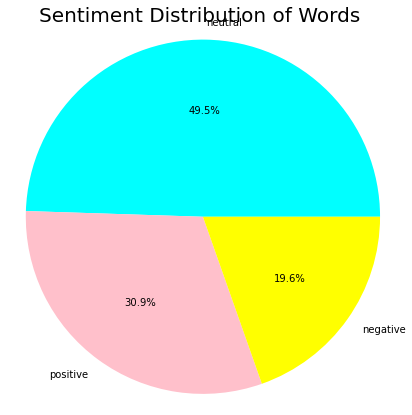

,index,sentiments
0,neutral,1929
1,positive,1205
2,negative,764


In [183]:
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

words["sentiments"]=words["cluster_value"].map(emotion)


fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["cyan","pink","yellow"]
df_pie=words["sentiments"].value_counts().reset_index()
plt.pie(df_pie["sentiments"],labels=df_pie["index"],radius=2,colors=colors,autopct="%1.1f%%")
plt.axis('equal')
plt.title("Sentiment Distribution of Words ", fontsize=20)
plt.show()
df_pie

## Out of 19911 unique words and bigram from the dataset:
   * 13171 (66.2%) are Neutral sentiments
   * 4083 (20.5%) are Positive sentiments
   * 2657 (13.3%) are Negative sentiments
   
It shows that the Neutral and Positive words have larger domination in the dataset

In [184]:
# define a function to get the sentiment for the entire tweet
def get_sentiments(x,sent_dict):
    '''
    x:         List
               Input data: Row of a DataFrame
    sent_dict: Dictionary
               Input: Dictionary of Words: Sentiments
    sentiment: String
               Output: Sentiment of the whole sentence
    
    Function: Getting sentiments of the entire sentence by averaging out the sentiments of individual words
    '''
    total=0
    count=0
    test=x["clean_tweet"]
    for t in test:
        if words_dict.get(t):
            total+=int(sent_dict.get(t))
        count+=1 
    avg=total/count
    sentiment=-1 if avg<-0.15 else 1 if avg >0.15 else 0
    return sentiment

In [185]:
# creating a dictionary of the word and its cluster value
words_dict = dict(zip(words.words, words.cluster_value))

In [186]:
## Removing all tweets which do not have the word:"covid"
CoVid19_df = cleaned_dataset.copy()
CoVid19_df=CoVid19_df[CoVid19_df["cleaned_tweet"].str.contains("loot")]
CoVid19_df.shape 

(3868, 40)

In [187]:
# adding sentiment column
CoVid19_df["sentiment"]=CoVid19_df.apply(get_sentiments,args=(words_dict,),axis=1)

In [188]:
# checking the value counts of each sentiment
CoVid19_df["sentiment"].value_counts()

 1    2423
 0    1374
-1      71
Name: sentiment, dtype: int64

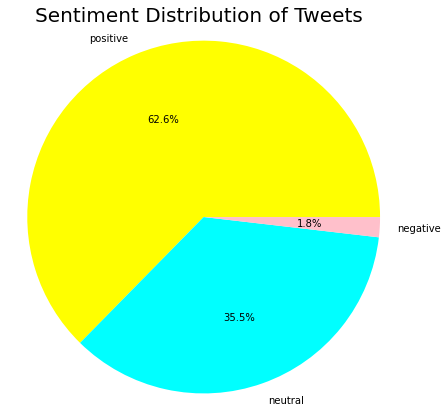

,index,sentiments_val
0,positive,2423
1,neutral,1374
2,negative,71


In [189]:
# Plotting pie chart of Sentiment Distribution of tweets
emotion = {0: "neutral",
           1: "positive",
          -1: "negative"}

CoVid19_df["sentiments_val"]=CoVid19_df["sentiment"].map(emotion)
df_pie=CoVid19_df["sentiments_val"].value_counts().reset_index()
fig = plt.gcf()
fig.set_size_inches(7,7)
colors = ["yellow","cyan","pink"]
plt.pie(df_pie["sentiments_val"],labels=df_pie["index"],radius=2,autopct="%1.1f%%", colors=colors)
plt.axis('equal')
plt.title("Sentiment Distribution of Tweets ", fontsize=20)
plt.savefig("Sentiment_Distribution.png")
plt.show()
df_pie

In [190]:
df_negative = CoVid19_df[CoVid19_df["sentiment"]==-1]

In [191]:
# checking the cause of negative tweets in 2019
list(df_negative['cleaned_tweet'][(CoVid19_df['year']==2021)&(CoVid19_df['month']==7)])

['sbwl uku loot wa',
 'km crocodile zulu loot tail',
 'happen vehicle enter phoenix black loot',
 'loot progress',
 'bee sister lead loot',
 'loot duduzilezuma saynotolooting',
 'think loot dark color',
 'hey hey amazulu loot',
 'siya sandf kznviolence kznlooting',
 'mast crack cocaine smoke loot kznshutdown',
 'loot sanbs',
 "' break sanbs loot",
 'watch live loot right unbelievable',
 'loot basically free shop spree mk',
 'see lockdown remix feature loot',
 'sundown loot',
 'result stupid loot arrange duduzilezuma',
 'kikikikikiki pitso loot goal',
 'loot progress cafclfinal',
 'beauty loot',
 'yhooo loot along way way',
 "haibo anisatsh ' uba nosilili loot",
 'sundown loot',
 "anc ' govern loot know",
 "' loot wimpy breakfast",
 'try loot god',
 'za looter see take advantage',
 'prefer loot',
 'do loot merc',
 'lee loot responsibly stupid',
 'forget people loot newzroomafrika',
 'mallofafrica loot looter duduzilezuma cyrilramaphosa presidentcyrilramaphosa',
 'badela akaboni ukuthi l

In [192]:
# some Negative tweets
list(CoVid19_df[CoVid19_df["sentiment"]==-1]["cleaned_tweet"][300:330])

[]

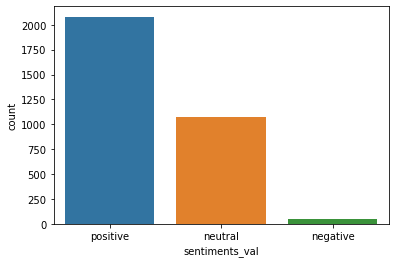

In [193]:
data_list=["sad","gunshot", "migraine","loot "," stuffy "," lockdownsa "," hospitalise "," food "]
pattern="|".join(data_list)
df_car_sent=CoVid19_df[(CoVid19_df["cleaned_tweet"].str.contains(pattern))]
sns.countplot(x=df_car_sent["sentiments_val"]);

In [194]:
def create_wordcloud(text):
    words=' '.join([words for words in text])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

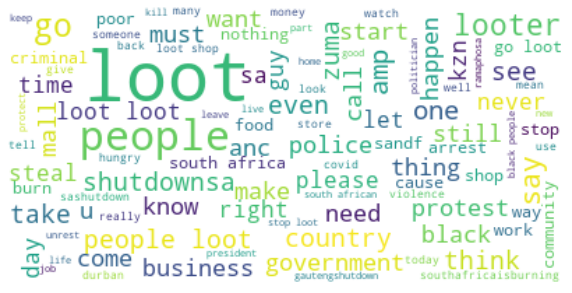

In [195]:
#wordcloud for all tweets
create_wordcloud(CoVid19_df["cleaned_tweet"].values)

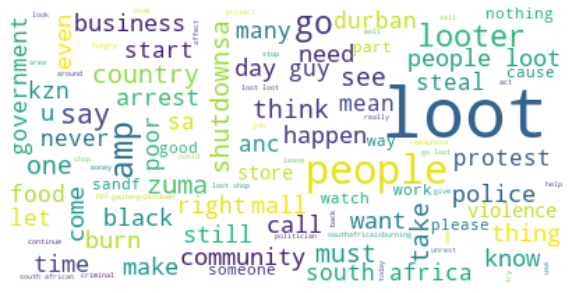

In [196]:
#wordcloud for positive tweets
create_wordcloud(CoVid19_df[CoVid19_df["sentiment"]==1]["cleaned_tweet"].values)

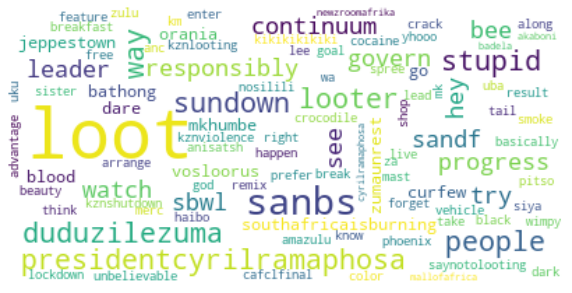

In [197]:
#wordcloud for negative tweets
create_wordcloud(CoVid19_df[CoVid19_df["sentiment"]==-1]["cleaned_tweet"].values)

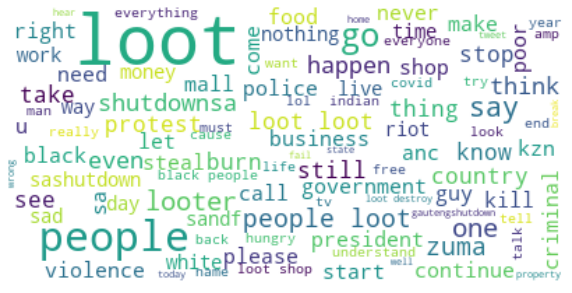

In [198]:
#wordcloud for neutral tweets
create_wordcloud(CoVid19_df[CoVid19_df["sentiment"]==0]["cleaned_tweet"].values)

## Data Modelling
  Considering labels obtained through custom trained word2vec model, we'll split the data into <b>X</b>(Input Tweet) and <b>y</b> (sentiments)

In [199]:
CoVid19_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
6,1418148528552091648,1418148528552091648,2021-07-22 11:58:51 SAST,2021-07-22,11:58:51,200,1009730975541194752,qmqilingwa,StuFuza esihle😍❤️,NaN,...,NaN,NaN,NaN,NaN,"[neighbor, casually, tell, loot, story, ward, ...",neighbor casually tell loot story ward counsel...,7,2021,1,positive
9,1418134990739709953,1418134990739709953,2021-07-22 11:05:04 SAST,2021-07-22,11:05:04,200,771267325,mbatha__m,theGreatShandu,NaN,...,NaN,NaN,NaN,NaN,"[kind, loot, ', will, die]",kind loot ' will die,7,2021,0,neutral
10,1418133634037518338,1418133634037518338,2021-07-22 10:59:40 SAST,2021-07-22,10:59:40,200,1443988494,gumedenoluthand,Noluthando Gumede,NaN,...,NaN,NaN,NaN,NaN,"[order, baby, formula, disposable, nappy, th, ...",order baby formula disposable nappy th july ' ...,7,2021,0,neutral
13,1418110116310753281,1418110116310753281,2021-07-22 09:26:13 SAST,2021-07-22,09:26:13,200,1244989420996104194,mmvumisa,All Things Started Black🖤,NaN,...,NaN,NaN,NaN,NaN,"[drive, around, ', see, sign, loot, sign, dest...",drive around ' see sign loot sign destruction ...,7,2021,1,positive
14,1418100665948286978,1418100665948286978,2021-07-22 08:48:40 SAST,2021-07-22,08:48:40,200,4817914091,sphewasembo,#FreeJacobZuma,NaN,...,NaN,NaN,NaN,NaN,"[government, criminal, syndicate, drug, den, n...",government criminal syndicate drug den never r...,7,2021,1,positive


In [200]:
print(len(CoVid19_df))

3868


In [201]:
# convert each sentiment to df
pos=CoVid19_df[CoVid19_df["sentiments_val"]=="positive"].sample(n=5000, replace=True)
neg=CoVid19_df[CoVid19_df["sentiments_val"]=="negative"].sample(n=5000, replace=True)
neu=CoVid19_df[CoVid19_df["sentiments_val"]=="neutral"].sample(n=5000, replace=True)

In [202]:
# combine all sentiments in one df
pdList = [pos,neg,neu] 
df_train = pd.concat(pdList)

In [203]:
#splitting the data to two(training and testing data)and validation data which I will keep aside for
# model validation later
df2, df_val = train_test_split(df_train, test_size= 0.2, random_state=10)

In [204]:
X = df2['cleaned_tweet']
y = df2['sentiment']

In [205]:
# Split the dataset set int0 training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine learning

#### TF/IDF Features

In [206]:
# Instantiate and fit TfidfVectorizer 
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),stop_words='english')

In [207]:
X_train_tf= vectorizer.fit_transform(X_train.reset_index()["cleaned_tweet"]).toarray()
X_test_tf = vectorizer.transform(X_test.reset_index()["cleaned_tweet"]).toarray()

In [208]:
X_train_tf.shape

(9600, 11829)

In [209]:
feature_names =vectorizer.get_feature_names() 

## Metrics

#### F1 Score (F1)

$$\text{F1} = 2*\frac{\text{precision * recall}}{\text{precision + recall}} $$

$$\text{} = \frac{\text{TP}}{\text{TP+1/2(FP+FN)}} $$


F1 Score  is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric.F1-score is a better choice of metric when there are imbalanced classes as in our case.  **F1 score shows that we have less False positives and False negatives**.

#### Running the data over various models to check which is best suited model for our data

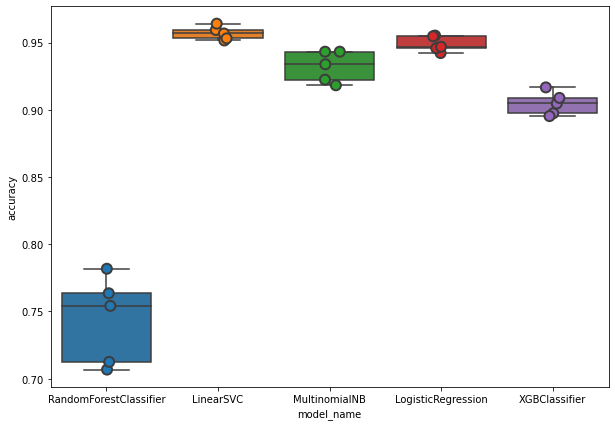

In [210]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    XGBClassifier(eval_metric='mlogloss')
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tf, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
plt.subplots(figsize = (10,7))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

#### From the above graph, it can be seen that the LogisticRegression  has the highest mean accuracy

In [211]:
# check the mean of the accuracy for each model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.956979
LogisticRegression        0.948958
MultinomialNB             0.932188
RandomForestClassifier    0.743750
XGBClassifier             0.904583
Name: accuracy, dtype: float64

### Logistic Regression Model

In [212]:
#creating a dict of Sentiment_val: sentiments to use with the confusion matrix
sentiment_id_df =df_train[['sentiments_val', 'sentiment']].drop_duplicates().sort_values('sentiment')
sentiment_to_id = dict(sentiment_id_df.values)

In [213]:
# Instantiate the model
logisticRegr = LogisticRegression(random_state=0)
# Fit the model
logisticRegr.fit(X_train_tf, y_train)
#Predict
y_pred = logisticRegr.predict(X_test_tf)

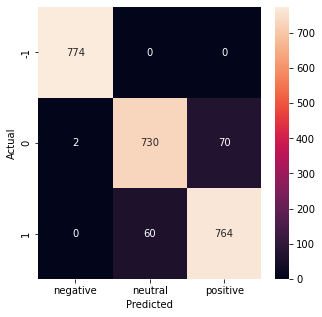

In [214]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [215]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       774
           0       0.92      0.91      0.92       802
           1       0.92      0.93      0.92       824

    accuracy                           0.94      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.94      0.94      0.94      2400



In [216]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test_tf, y_test)
print(score)

0.945


In [217]:
def plot_coefficients(classification, feature_names, top_features=20):
    size=len(feature_names)
    coef_neg = classification.coef_[-1][:size]
    coef_pos = classification.coef_[1][:size]
    top_positive_coefficients = np.argsort(coef_pos[coef_pos>0])[-top_features:]
    top_negative_coefficients = np.argsort(coef_pos[coef_neg<0])[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    coef=np.hstack([coef_neg,coef_pos])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    title="Positive and Negative Labels"
    plt.title(title)
    plt.show()

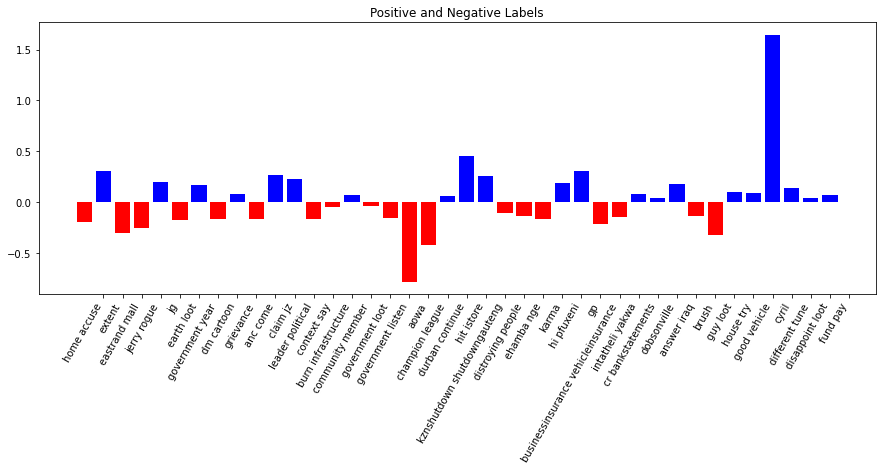

In [218]:
coefs_with_fns = sorted(zip(logisticRegr.coef_[0], feature_names)) 
df_feat=pd.DataFrame(coefs_with_fns)
df_feat.columns='coefficient','word'
df_feat.sort_values(by='coefficient')

plot_coefficients(logisticRegr, feature_names)

### MultinomialNB Model

In [219]:
# Instantiate the model
nb = MultinomialNB()
# Fit the model
nb.fit(X_train_tf, y_train)
# predict
y_pred_nb = nb.predict(X_test_tf)

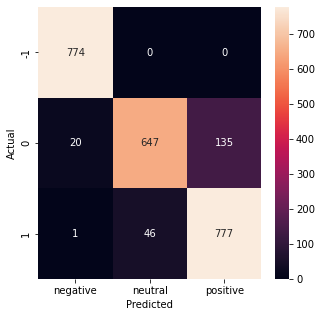

In [220]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [221]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.99       774
           0       0.93      0.81      0.87       802
           1       0.85      0.94      0.90       824

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.91      2400



In [222]:
# Use score method to get accuracy of model
nb_score = nb.score(X_test_tf, y_test)
print(score)

0.945


### MultinomialNB  VS LogisticRegression

* The mean accuracy of LogisticRegression is 75%
* The mean accuracy of MultinomialNB  is  74.9%
* Although both of the models have very close accuracy scores when we plot the confusion matrix and classification report, we can see that MultinomialNB has a better F1 score than LogisticRegression for identifying negative and neutral Tweets 
* As a result, it can identify the negative and neutral tweets more accurately than Logistic Regression.
Hence, We choose Multinomial Naive Bayes as our final model.


In [223]:
#validate the model
df_val= df_val.reset_index()
df_val.tail()

,index,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
2995,2241,1416794966723080193,1416728980082790415,2021-07-18 18:20:17 SAST,2021-07-18,18:20:17,200,1278738470157066242,mavundl61739718,sihlali ! mavundla! Tsabedze.,...,NaN,NaN,NaN,NaN,"[foundation, mzwanele, people, starve, pieterm...",foundation mzwanele people starve pietermaritz...,7,2021,1,positive
2996,1531,1413935904348065796,1413935904348065796,2021-07-10 20:59:23 SAST,2021-07-10,20:59:23,200,377302062,mfanah_ngethe,Mfaniseni,...,NaN,NaN,NaN,NaN,"[', loot, spree, target, shop, kznshutdown]",' loot spree target shop kznshutdown,7,2021,0,neutral
2997,3079,1415560310577061893,1415560310577061893,2021-07-15 08:34:12 SAST,2021-07-15,08:34:12,200,624159992,mathumetsemj,Motanyane,...,NaN,NaN,NaN,NaN,"[someone, world, call, presser, say, fighter, ...",someone world call presser say fighter country...,7,2021,1,positive
2998,8486,1414559084939038721,1414557502377795587,2021-07-12 14:15:41 SAST,2021-07-12,14:15:41,200,1368313477786439682,lomaswatidlami1,Double Jabbed Queen 👸,...,NaN,NaN,NaN,NaN,"[aowa, bathong, do, also, loot]",aowa bathong do also loot,7,2021,-1,negative
2999,4834,1414658807037415428,1414658807037415428,2021-07-12 20:51:57 SAST,2021-07-12,20:51:57,200,1226424701083430912,lungile23080586,Luh💕💕,...,NaN,NaN,NaN,NaN,"[htf, loot, sanbs]",htf loot sanbs,7,2021,-1,negative


In [224]:
CoVid19_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet,month,year,sentiment,sentiments_val
6,1418148528552091648,1418148528552091648,2021-07-22 11:58:51 SAST,2021-07-22,11:58:51,200,1009730975541194752,qmqilingwa,StuFuza esihle😍❤️,NaN,...,NaN,NaN,NaN,NaN,"[neighbor, casually, tell, loot, story, ward, ...",neighbor casually tell loot story ward counsel...,7,2021,1,positive
9,1418134990739709953,1418134990739709953,2021-07-22 11:05:04 SAST,2021-07-22,11:05:04,200,771267325,mbatha__m,theGreatShandu,NaN,...,NaN,NaN,NaN,NaN,"[kind, loot, ', will, die]",kind loot ' will die,7,2021,0,neutral
10,1418133634037518338,1418133634037518338,2021-07-22 10:59:40 SAST,2021-07-22,10:59:40,200,1443988494,gumedenoluthand,Noluthando Gumede,NaN,...,NaN,NaN,NaN,NaN,"[order, baby, formula, disposable, nappy, th, ...",order baby formula disposable nappy th july ' ...,7,2021,0,neutral
13,1418110116310753281,1418110116310753281,2021-07-22 09:26:13 SAST,2021-07-22,09:26:13,200,1244989420996104194,mmvumisa,All Things Started Black🖤,NaN,...,NaN,NaN,NaN,NaN,"[drive, around, ', see, sign, loot, sign, dest...",drive around ' see sign loot sign destruction ...,7,2021,1,positive
14,1418100665948286978,1418100665948286978,2021-07-22 08:48:40 SAST,2021-07-22,08:48:40,200,4817914091,sphewasembo,#FreeJacobZuma,NaN,...,NaN,NaN,NaN,NaN,"[government, criminal, syndicate, drug, den, n...",government criminal syndicate drug den never r...,7,2021,1,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,1430672480461590534,1430628740636291072,2021-08-26 01:24:34 SAST,2021-08-26,01:24:34,200,316757985,me_minime,Fauxmunist-Insurgent No. 1,NaN,...,NaN,NaN,NaN,NaN,"[phoenixmassacre, black, hatred, continue, tar...",phoenixmassacre black hatred continue target d...,8,2021,0,neutral
9803,1430634557800321033,1430499019604860932,2021-08-25 22:53:53 SAST,2021-08-25,22:53:53,200,1407198990,hlabane_g,Mind Leverage,NaN,...,NaN,NaN,NaN,NaN,"[hm, malema, malelma, use, zumamustfall, build...",hm malema malelma use zumamustfall build eff e...,8,2021,0,neutral
9872,1430207941412597766,1430168508403494931,2021-08-24 18:38:39 SAST,2021-08-24,18:38:39,200,1034529934184730625,gloriakhuzwayo,Gorgias71,NaN,...,NaN,NaN,NaN,NaN,"[angihleki, ngiyasikaza, joke, one, peddler, h...",angihleki ngiyasikaza joke one peddler hearsay...,8,2021,0,neutral
9884,1430143662483296277,1430143662483296277,2021-08-24 14:23:14 SAST,2021-08-24,14:23:14,200,253459824,bananaswise,Bananas and the 3 Wise Monkeys,NaN,...,NaN,NaN,NaN,NaN,"[major, ha, hide, agenda, phoenix, massacre, a...",major ha hide agenda phoenix massacre absolute...,8,2021,1,positive


#### Testing the data

In [225]:
# create new df contains the sentiment and its encoded value, and create two dictionaries
sentiment_id_df =CoVid19_df[['sentiments_val', 'sentiment']].drop_duplicates().sort_values('sentiment')
sentiment_to_id = dict(sentiment_id_df.values)
print("sentiment_to_id: ",sentiment_to_id)
id_to_sentiment = dict(sentiment_id_df[['sentiment', 'sentiments_val']].values)
print("id_to_sentiment: ",id_to_sentiment)

sentiment_to_id:  {'negative': -1, 'neutral': 0, 'positive': 1}
id_to_sentiment:  {-1: 'negative', 0: 'neutral', 1: 'positive'}


In [226]:
dataset["tweet"][318]

"What if Cyril planned this riot?🤔  He knew there was gonna be some form of an uprising, he was given the intelligence, but didn't act on it.   What if he let the protests go, but then had his own people, already paid, to cause the damage and then blame Zuma and his allies?"

In [227]:
tweet = dataset["tweet"][318]

In [228]:
# test the data
clean=vectorizer.transform([tweet]) #apply TFIDF
pred=logisticRegr.predict(clean) # predict the tweet using out model
pred=id_to_sentiment[pred[0]]
print(pred)

positive


In [229]:
tweet2 = dataset["tweet"][308]

In [230]:
# test the data
clean2=vectorizer.transform([tweet2]) #apply TFIDF
pred2=logisticRegr.predict(clean2) # predict the tweet using out model
predD=id_to_sentiment[pred2[0]]
print(predD)

positive


In [231]:
tweet3 = dataset["tweet"][120]

In [232]:
# test the data
clean3=vectorizer.transform([tweet3]) #apply TFIDF
pred3=logisticRegr.predict(clean3) # predict the tweet using out model
predF=id_to_sentiment[pred3[0]]
print(predF)

neutral


### Validate the model

In [233]:
# Define our X and y
X_val = df_val['cleaned_tweet']
y_val = df_val['sentiment']

In [234]:
# vectorize the model
vectorizer = TfidfVectorizer(min_df=3,sublinear_tf=True,encoding="latin-1", ngram_range=(1,2),
                             stop_words='english')

In [235]:
X_val_tf= vectorizer.fit_transform(X_val.reset_index()['cleaned_tweet']).toarray()

In [236]:
nb.fit(X_val_tf, y_val)

MultinomialNB()

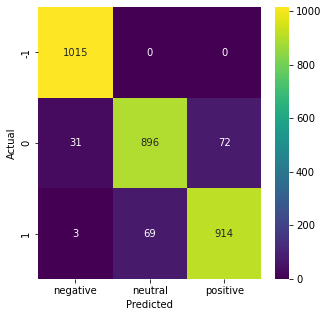

In [237]:
#Plotting Confusion matrix to evaluate the model results
conf_mat = confusion_matrix(y_val, nb.predict(X_val_tf))
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='viridis',
            xticklabels=sentiment_id_df.sentiments_val.values, yticklabels=sentiment_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [238]:
print(metrics.classification_report(y_val,nb.predict(X_val_tf)))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98      1015
           0       0.93      0.90      0.91       999
           1       0.93      0.93      0.93       986

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



### Topic Modeling in Python with Looting Twitter dataset
   1. https://medium.datadriveninvestor.com/trump-tweets-topic-modeling-using-latent-dirichlet-allocation-e4f93b90b6fe

In [254]:
dataset = pd.read_csv(root_dir + 'Combinedlootingdata.csv', encoding='utf-8')#nrows=51000

In [255]:
dataset.head(2)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,"-29.818746,30.836648,30km",NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [256]:
cleaned_dataset.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,clean_tweet,cleaned_tweet,month,year
0,1418278758692397061,1418146785084813312,2021-07-22 20:36:21 SAST,2021-07-22,20:36:21,200,2356461407,lordmntungwa,Mashobane,NaN,...,NaN,"[{'screen_name': 'Thabane90252110', 'name': 'B...",NaN,NaN,NaN,NaN,"[peprah, mbalu, fc]",peprah mbalu fc,7,2021
1,1418254055164497923,1418254055164497923,2021-07-22 18:58:11 SAST,2021-07-22,18:58:11,200,436864012,xngubane,xolani Ngubane,NaN,...,NaN,[],NaN,NaN,NaN,NaN,"[realy, mean, say, jacob, zuma, go, arrest, st...",realy mean say jacob zuma go arrest stage jaco...,7,2021
2,1418219046470774799,1418217292609966083,2021-07-22 16:39:04 SAST,2021-07-22,16:39:04,200,925778389713203201,mfanakagogo13,Mfanakagogo,NaN,...,NaN,"[{'screen_name': 'MrHandsome_ZA', 'name': 'Mr ...",NaN,NaN,NaN,NaN,"[za, truth, zuma, develop, home, province, eas...",za truth zuma develop home province eastern ca...,7,2021


In [257]:
tweets_df=cleaned_dataset.loc[:,['cleaned_tweet']]
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9864 entries, 0 to 9898
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cleaned_tweet  9864 non-null   object
dtypes: object(1)
memory usage: 154.1+ KB


In [259]:
a = 4270
for i in range(a,a+10):
    print(tweets_df.cleaned_tweet[i])
    print()

sandf member people still loot

south africa need prayer need revise bill right law breaker right law enforcer unrest zumaarrest shutdown loot chooseday

kenny hao qeta bo ke kgetha zuma

loot spree affect everyone loot business hire people potentially buy product industry people jobless industry force issue section letter due revenue loss

police officer deploy fight loot

wanna loot one

violence excite wena stay bloubergstrand njandini

loot looter gautengshutdown kznshutdown kznprotest zumaunrest katlehong

penene ' get cps security protect place ' come within ' plan loot

pain ongoing unrest across nation pray almighty grant u strength push uncertain time word chairman allah grant u strength amp may mean make community safer



## Exploratory Data Analysis

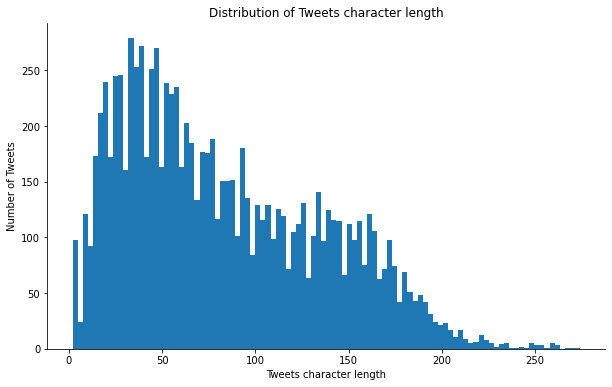

In [260]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df.cleaned_tweet]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

# Wordcloud

In [261]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

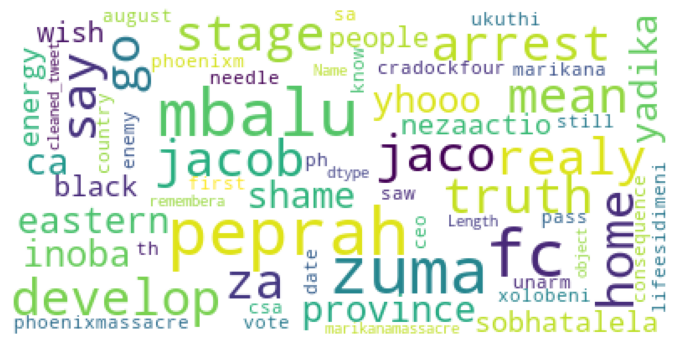

In [264]:
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=500,max_font_size=40,
                                                random_state=100).generate(str(tweets_df.cleaned_tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

# Unigram approach

In [265]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [266]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [268]:
common_words = get_top_n_words(tweets_df.cleaned_tweet, 10)
unigram = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [270]:
unigram

,unigram,count
0,loot,4148
1,zuma,3141
2,people,1797
3,violence,775
4,say,685
5,president,611
6,sandf,546
7,country,511
8,amp,505
9,protest,501


# Trigrams

In [274]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [275]:
common_words = get_top_n_trigram(tweets_df.cleaned_tweet, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram', 'count'])

In [276]:
trigram

,trigram,count
0,president jacob zuma,66
1,president cyril ramaphosa,39
2,shutdownsa shutdowngauteng shutdownkzn,30
3,kill black people,21
4,makro durban joburg,21
5,glen ridge shoprite,21
6,shutdowngauteng shutdownkzn makro,20
7,shutdownkzn makro durban,20
8,durban joburg istore,20
9,joburg istore atm,20


## Topic modeling

In [279]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(analyzer='word',       
            min_df=3,# minimum required occurences of a word 
            stop_words='english',# remove stop words
            lowercase=True,# convert all words to lowercase
            token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
            max_features=5000,# max number of unique words
            )

data_matrix = vectorizer.fit_transform(tweets_df.cleaned_tweet)

In [280]:
data_matrix

<9864x3908 sparse matrix of type '<class 'numpy.int64'>'
	with 88666 stored elements in Compressed Sparse Row format>

In [281]:
lda_model = LatentDirichletAllocation(
            n_components=10, # Number of topics
            learning_method='online',
            random_state=20,       
            n_jobs = -1  # Use all available CPUs
)
lda_output = lda_model.fit_transform(data_matrix)

In [282]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  18.099132
5       0.648955  71.707100       2        1  13.033790
0      71.019684   9.971006       3        1  10.885797
1       3.785981  33.185135       4        1  10.558893
9     -42.666500  -9.222070       5        1  10.516433
8      -3.621689 -43.526516       6        1  10.451373
3      -3.632402  -4.171708       7        1   8.798289
2     -36.584400  35.804413       8        1   7.342231
4      44.391380  50.615383       9        1   5.825233
7      40.235809 -31.591665      10        1   4.488828, topic_info=           Term         Freq        Total Category  logprob  loglift
3891       zuma  2847.000000  2847.000000  Default  30.0000  30.0000
1976       loot  3775.000000  3775.000000  Default  29.0000  29.0000
2517     people  1751.000000  1751.000000  Default  28.0000  28.0000
2653  president   571.000000   571.000000  Default  27.0000  27.0000
3705   violence   692.000000   692.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
3757        way   110.043204   198.384235  Topic10  -3.6429   2.5142
2807     really    77.476773   157.457939  Topic10  -3.9938   2.3944
1015   economic    27.612387    49.796953  Topic10  -5.0255   2.5139
1976       loot    55.410858  3775.451846  Topic10  -4.3290  -1.1179
1899     leader    28.358877   164.204802  Topic10  -4.9988   1.3474

[489 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3         8  0.972060        abantu
18       10  0.961421        accord
19        6  0.994084       account
27        6  0.407869           act
27        7  0.583813           act
...     ...       ...           ...
3891      6  0.077256          zuma
3892      7  0.698181    zumaarrest
3892      8  0.290909    zumaarrest
3900      4  0.989639  zumaprotests
3903      6  0.980671    zumaunrest

[611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 2, 10, 9, 4, 3, 5, 8])

In [284]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['die', 'life', 'lose', 'think', 'mall', 'business', 'burn', 'protest', 'loot', 'people']


Top 10 words for topic #1:
['freejacobzuma', 'shop', 'pay', 'gautengshutdown', 'kznshutdown', 'steal', 'shutdownsa', 'sashutdown', 'phoenixmassacre', 'loot']


Top 10 words for topic #2:
['nkandla', 'busy', 'try', 'child', 'zulu', 'protect', 'work', 'community', 'sandf', 'loot']


Top 10 words for topic #3:
['poor', 'problem', 'southafricaisburning', 'sap', 'fail', 'people', 'stop', 'need', 'looter', 'loot']


Top 10 words for topic #4:
['social', 'mall', 'deal', 'company', 'shoot', 'force', 'marikanamassacre', 'issue', 'security', 'police']


Top 10 words for topic #5:
['jail', 'release', 'malema', 'phoenix', 'law', 'jacob', 'massacre', 'ramaphosa', 'president', 'zuma']


Top 10 words for topic #6:
['know', 'country', 'want', 'think', 'thing', 'amp', 'anc', 'people', 'loot', 'zuma']


Top 10 words for topic #7:
['loot', 'chief', 'dead', 'result', 'hold', 'really', 'fa

In [285]:
topic_values = lda_model.transform(data_matrix)
tweets_df['Topic'] = topic_values.argmax(axis=1)

In [287]:
tweets_df.head()

,cleaned_tweet,Topic
0,peprah mbalu fc,0
1,realy mean say jacob zuma go arrest stage jaco...,6
2,za truth zuma develop home province eastern ca...,8
3,yhooo yadika shame inoba sobhatalela nezaactio...,5
4,peprah mbalu fc,0
